
**Background:**
In this project Our goal is to establish a robust intelligent system to aid our value investing efforts using stock market data. We make investment decisions and based on intrinsic value of companies and do not trade on the basis of daily market volatility. Our profit realization strategy typically involves weekly, monthly and quarterly performance of stocks we buy or hold.



**Data exploration:**

In [1]:
import pandas as pd

# Read the Excel file
excel_file = pd.ExcelFile('/kaggle/input/stockprice/2020Q1Q2Q3Q4-2021Q1.xlsx')

# Get the sheet names
sheet_names = excel_file.sheet_names

# Iterate over each sheet
for sheet_name in sheet_names:
    # Read the sheet into a DataFrame
    df = excel_file.parse(sheet_name)
    
    # Print the sheet name
    print(f"Sheet Name: {sheet_name}")
    
    # Print the head of the sheet
    print(df.head())
    print()  # Empty line for separation

Sheet Name: Russia - Sberbank Rossii PAO (S
                  Date   Price    Open    High     Low    Vol.  Change %
0  2021-03-31 00:00:00  291.02     294  294.42  290.26  47.00M   -0.0076
1  2021-03-30 00:00:00  293.25  294.86  295.72   291.5  38.81M   -0.0002
2  2021-03-29 00:00:00   293.3  289.72  294.09  289.26  43.68M    0.0071
3  2021-03-26 00:00:00  291.22  288.63  292.75  288.32  56.07M    0.0159
4  2021-03-25 00:00:00  286.66   286.5  287.03  283.85  35.22M    0.0030

Sheet Name: Turkey - Koc Holding AS (KCHOL)
                  Date  Price   Open   High    Low    Vol.  Change %
0  2021-03-31 00:00:00  19.41  19.42  19.63  19.27  13.14M   -0.0046
1  2021-03-30 00:00:00   19.5  19.12  19.81  19.03  21.05M    0.0209
2  2021-03-29 00:00:00   19.1  19.24  19.67   19.1  16.56M   -0.0078
3  2021-03-26 00:00:00  19.25  20.28  20.36   19.1  21.35M   -0.0385
4  2021-03-25 00:00:00  20.02   20.5  20.86  20.02  15.93M   -0.0148

Sheet Name: Egypt - Medinet Nasr Housing (M
              

**Data Preparation:**

In [2]:
# Load the Excel file
file_path = '/kaggle/input/stockprice/2020Q1Q2Q3Q4-2021Q1.xlsx'
Russia = pd.read_excel(file_path, sheet_name='Russia - Sberbank Rossii PAO (S')  

# Convert date column to datetime format
Russia['Date'] = pd.to_datetime(Russia['Date'], infer_datetime_format=True, errors='coerce')


# Sort the data chronologically based on date
Russia = Russia.sort_values('Date')


# Print the updated DataFrame
print(Russia.head())
print(Russia.info())

          Date   Price    Open    High     Low    Vol.  Change %
310 2020-01-03     255  255.99  258.19   253.7  35.85M    0.0010
309 2020-01-06   253.9  254.75  254.84   251.4  22.35M   -0.0043
308 2020-01-08  259.15  253.57  259.15  253.03  40.82M    0.0207
307 2020-01-09  257.99   259.4  261.76  257.01  38.33M   -0.0045
306 2020-01-10  258.19  257.86  259.25  256.88  18.85M    0.0008
<class 'pandas.core.frame.DataFrame'>
Int64Index: 312 entries, 310 to 311
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      311 non-null    datetime64[ns]
 1   Price     312 non-null    object        
 2   Open      312 non-null    object        
 3   High      312 non-null    object        
 4   Low       312 non-null    object        
 5   Vol.      311 non-null    object        
 6   Change %  311 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 19.5+ KB
None


In [3]:
import pandas as pd

# Define a function to convert the string representation to a float value
def convert_volume(volume):
    if isinstance(volume, float):
        return volume
    elif volume == '-':
        return 0.0  # Set the value to 0 for the '-' case
    elif 'K' in volume:
        return float(volume.replace('K', '')) * 1000
    elif 'M' in volume:
        return float(volume.replace('M', '')) * 1000000
    else:
        return float(volume)
    
# Replace missing values with a default value (e.g., 0.0)
Russia['Vol.'] = Russia['Vol.'].fillna(0.0)

# Apply the conversion function to the "Volume" column
Russia['Vol.'] = Russia['Vol.'].apply(convert_volume)

# Convert the "Volume" column to float type
Russia['Vol.'] = Russia['Vol.'].astype(float)

Russia.rename(columns={'Vol.': 'Volume'}, inplace=True)

# Drop row 311
Russia = Russia.drop(index=311)


# Convert Price, Open, High, Low columns to float 
for col in ['Price', 'Open', 'High', 'Low']:
    Russia[col] = Russia[col].astype(float)
   
Russia.rename(columns={'Price': 'Close'}, inplace=True)

# Print the updated DataFrame
print(Russia.head(),'\n')
print(Russia.info(),'\n')

          Date   Close    Open    High     Low      Volume  Change %
310 2020-01-03  255.00  255.99  258.19  253.70  35850000.0    0.0010
309 2020-01-06  253.90  254.75  254.84  251.40  22350000.0   -0.0043
308 2020-01-08  259.15  253.57  259.15  253.03  40820000.0    0.0207
307 2020-01-09  257.99  259.40  261.76  257.01  38330000.0   -0.0045
306 2020-01-10  258.19  257.86  259.25  256.88  18850000.0    0.0008 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 310 to 0
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      311 non-null    datetime64[ns]
 1   Close     311 non-null    float64       
 2   Open      311 non-null    float64       
 3   High      311 non-null    float64       
 4   Low       311 non-null    float64       
 5   Volume    311 non-null    float64       
 6   Change %  311 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 19.4 KB
None 


**Data Exploration and Visualization:**

In [4]:
pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


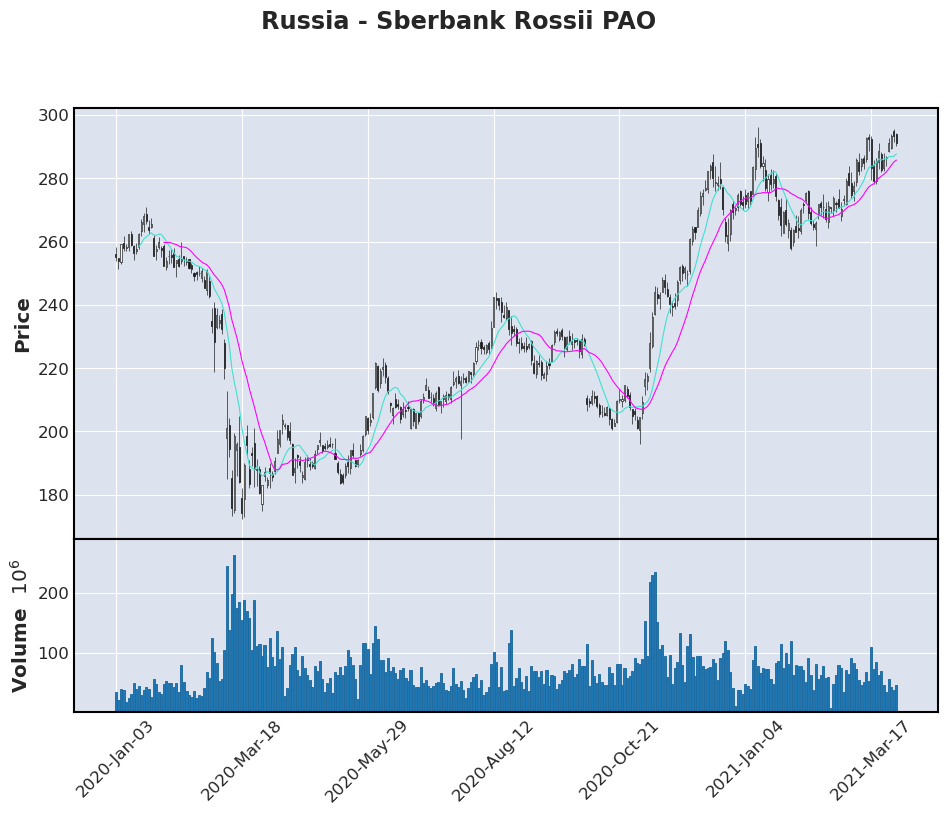

In [5]:
import mplfinance as mpf
import pandas as pd

if not isinstance(Russia.index, pd.core.indexes.datetimes.DatetimeIndex):
    Russia.set_index("Date", inplace=True)

mpf.plot(Russia, type='candle', volume=True, mav=(10, 20), figscale=1.5, title='Russia - Sberbank Rossii PAO')

In [6]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# Filter data for 2020 Q1, Q2, Q3, Q4
start_date = '2020-01-01'
end_date = '2020-12-31'
filtered_data = Russia.loc[(Russia.index >= start_date) & (Russia.index <= end_date)].copy()

# Compute moving averages
window_sizes = [7, 30, 90]
for window_size in window_sizes:
    col_name = f'{window_size}-day Moving Average'
    filtered_data.loc[:, col_name] = filtered_data['Close'].rolling(window=window_size).mean()

# Fill NaN values in 30-day and 90-day moving averages with values from 7-day moving average
filtered_data['7-day Moving Average'].fillna(filtered_data['Close'], inplace=True)
filtered_data['30-day Moving Average'].fillna(filtered_data['7-day Moving Average'], inplace=True)
filtered_data['90-day Moving Average'].fillna(filtered_data['7-day Moving Average'], inplace=True)

# Drop rows with NaN values
filtered_data.dropna(inplace=True)

# Define the features and target
features = filtered_data[['7-day Moving Average', '30-day Moving Average', '90-day Moving Average']]
target = filtered_data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create and train the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Mean Squared Error: 32.23092379575817
R-squared score: 0.9514533083993975


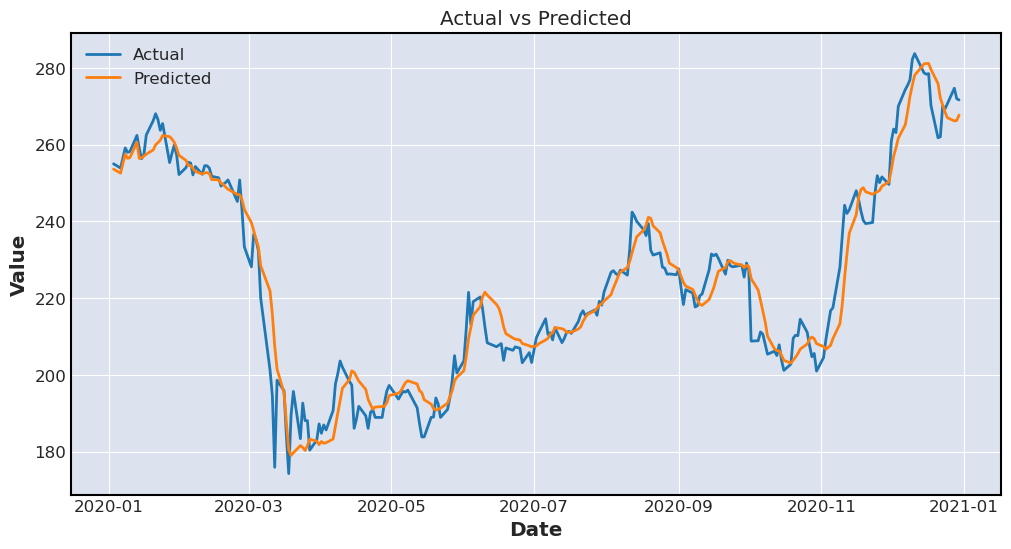

Mean Squared Error: 32.23092379575817
R-squared score: 0.9514533083993975


In [7]:
import matplotlib.pyplot as plt

# Increase the figure size
plt.figure(figsize=(12, 6))

# Plotting actual values
plt.plot(filtered_data.index, target, label='Actual')

# Plotting predicted values
plt.plot(filtered_data.index, regressor.predict(features), label='Predicted')


# Set labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Predicted')

# Add legend
plt.legend()

# Display the plot
plt.show()
print(f"Mean Squared Error: {mse}")
print("R-squared score:", r2)

In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Filter data for Q1 2021
start_date21 = '2021-01-01'
end_date21 = '2021-03-31'
q1_data = Russia.loc[(Russia.index >= start_date21) & (Russia.index <= end_date21)].copy()

# Compute moving averages for Q1 2021
window_sizes21 = [7, 30, 90]
for window_size21 in window_sizes21:
    col_name = f'{window_size21}-day Moving Average'
    q1_data[col_name] = q1_data['Close'].rolling(window=window_size21).mean()

# Fill NaN values in 30-day and 90-day moving averages with values from 7-day moving average
q1_data['30-day Moving Average'].fillna(q1_data['7-day Moving Average'], inplace=True)
q1_data['90-day Moving Average'].fillna(q1_data['7-day Moving Average'], inplace=True)

# Drop rows with NaN values
q1_data.dropna(inplace=True)

# Check if there are samples for Q1 2021 after dropping NaN values
if q1_data.shape[0] < 1:
    print("No data available for Q1 2021.")
else:
    # Define the features and target for Q1 2021
    q1_features = q1_data[['7-day Moving Average', '30-day Moving Average', '90-day Moving Average']]
    q1_target = q1_data['Close']

    # Make predictions for Q1 2021
    q1_predictions = regressor.predict(q1_features)  # Assuming 'regressor' is your trained model

    # Evaluate the model using Mean Squared Error (MSE) for Q1 2021
    q1_mse = mean_squared_error(q1_target, q1_predictions)
    print(f"Mean Squared Error (Q1 2021): {q1_mse}")
    
    # Calculate R-squared score
    r2 = r2_score(y_test, y_pred)
    print("R-squared score:", r2)


Mean Squared Error (Q1 2021): 23.78114760097834
R-squared score: 0.9514533083993975


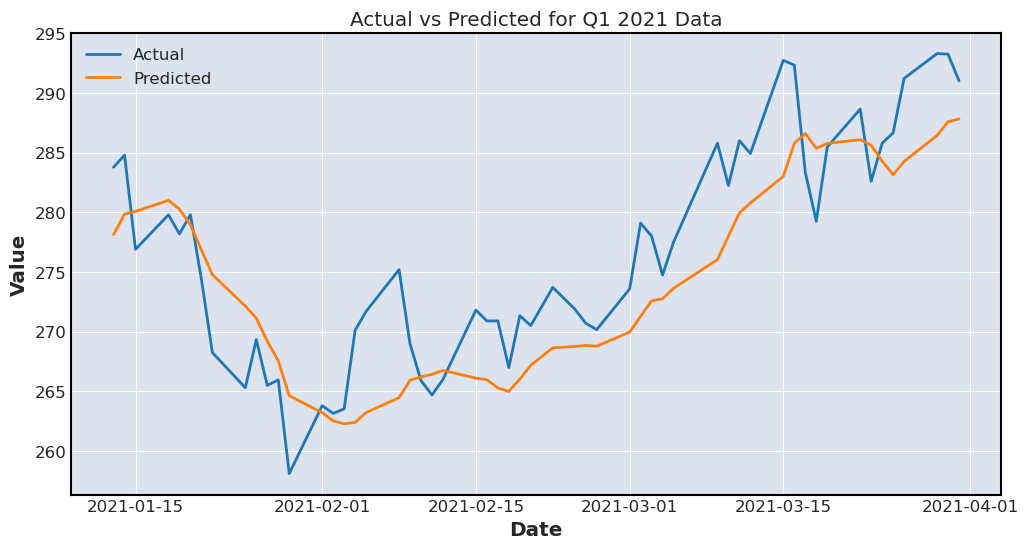

Mean Squared Error (Q1 2021): 23.78114760097834
R-squared score: 0.9514533083993975


In [9]:
import matplotlib.pyplot as plt

# Increase the figure size
plt.figure(figsize=(12, 6))

# Plotting actual values
plt.plot(q1_data.index, q1_target, label='Actual')

# Plotting predicted values
plt.plot(q1_data.index, q1_predictions, label='Predicted')


# Set labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Predicted for Q1 2021 Data')

# Add legend
plt.legend()

# Display the plot
plt.show()

print(f"Mean Squared Error (Q1 2021): {q1_mse}")
print("R-squared score:", r2)

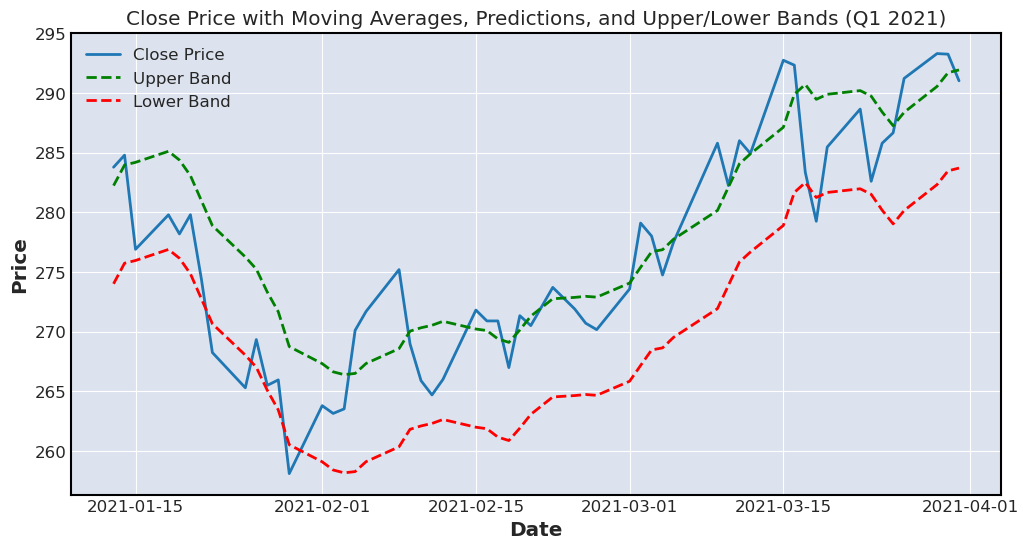

In [10]:
    import numpy as np
    
    # Calculate upper and lower bands based on the predictions
    rstd = q1_predictions.std()  # Calculating the residual standard deviation
    upper_band = q1_predictions + (.5 * rstd)
    lower_band = q1_predictions - (.5 * rstd)

    # Plot close prices with upper and lower bands
    plt.figure(figsize=(12, 6))
    plt.plot(q1_data.index, q1_data['Close'], label='Close Price')
    plt.plot(q1_data.index, upper_band, label='Upper Band', linestyle='--', color='g')
    plt.plot(q1_data.index, lower_band, label='Lower Band', linestyle='--', color='r')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Close Price with Moving Averages, Predictions, and Upper/Lower Bands (Q1 2021)')
    plt.legend()
    plt.show()
 

In [11]:
# Calculate upper and lower bands based on the predictions
rstd = q1_predictions.std()  # Calculating the residual standard deviation
upper_band =pd.DataFrame(q1_predictions + (.5 * rstd))
lower_band = pd.DataFrame(q1_predictions - (.5 * rstd))

# Create a new column to store the classification labels
q1_data['Classification'] = 'Hold'

# Iterate over the data and classify based on intersections
for i in range(1, q1_data.shape[0]):
    if q1_data['Close'].iloc[i] > upper_band.iloc[i][0] and q1_data['Close'].iloc[i - 1] <= upper_band.iloc[i - 1][0]:
        q1_data['Classification'].iloc[i] = 'Sell'
    elif q1_data['Close'].iloc[i] < lower_band.iloc[i][0] and q1_data['Close'].iloc[i - 1] >= lower_band.iloc[i - 1][0]:
        q1_data['Classification'].iloc[i] = 'Buy'

# Print the data with classification labels
print(q1_data[['Close', '30-day Moving Average', '90-day Moving Average', 'Classification']])

             Close  30-day Moving Average  90-day Moving Average  \
Date                                                               
2021-01-13  283.78             281.004286             281.004286   
2021-01-14  284.79             282.831429             282.831429   
2021-01-15  276.90             283.074286             283.074286   
2021-01-18  279.79             284.054286             284.054286   
2021-01-19  278.19             283.275714             283.275714   
2021-01-20  279.80             281.891429             281.891429   
2021-01-21  274.40             279.664286             279.664286   
2021-01-22  268.25             277.445714             277.445714   
2021-01-25  265.30             274.661429             274.661429   
2021-01-26  269.34             273.581429             273.581429   
2021-01-27  265.50             271.540000             271.540000   
2021-01-28  265.96             269.792857             269.792857   
2021-01-29  258.11             266.694286       

/tmp/ipykernel_20/757242668.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q1_data['Classification'].iloc[i] = 'Buy'
/tmp/ipykernel_20/757242668.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q1_data['Classification'].iloc[i] = 'Sell'


In [12]:
import pandas as pd
import plotly.graph_objects as go
from plotly.offline import plot


# Add this line to display plots inline
%matplotlib inline

# Create traces for the buy/sell signals
buy_signals = go.Scatter(
    x=q1_data[q1_data['Classification'] == 'Buy'].index,
    y=q1_data[q1_data['Classification'] == 'Buy']['Close'],
    mode='markers',
    marker=dict(symbol='triangle-up', size=10, color='green'),
    name='Buy Signals'
)
sell_signals = go.Scatter(
    x=q1_data[q1_data['Classification'] == 'Sell'].index,
    y=q1_data[q1_data['Classification'] == 'Sell']['Close'],
    mode='markers',
    marker=dict(symbol='triangle-down', size=10, color='red'),
    name='Sell Signals'
)

# Trace for the actual price
actual_price = go.Scatter(
    x=q1_data.index,
    y=q1_data['Close'],
    mode='lines',
    name='Actual Price'
)

# Create the layout
layout = go.Layout(
    title='Stock Price with Buy/Sell Signals',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Price')
)

# Create the data variable and include all the traces
data = [actual_price, buy_signals, sell_signals]

# Create the figure and plot
fig = go.Figure(data=data, layout=layout)

# Change this line to specify the rendering method as an iframe
fig.show(renderer='iframe')

# Export the plot to an HTML file
plot(fig, filename='RussiaStockPlot.html')

'RussiaStockPlot.html'

**Turkey - Koc Holding AS (KCHOL)**

In [13]:
# Load the Excel file
file_path = '/kaggle/input/stockprice/2020Q1Q2Q3Q4-2021Q1.xlsx'
Turkey = pd.read_excel(file_path, sheet_name='Turkey - Koc Holding AS (KCHOL)')  

# Convert date column to datetime format
Turkey['Date'] = pd.to_datetime(Turkey['Date'], infer_datetime_format=True, errors='coerce')


# Sort the data chronologically based on date
Turkey = Turkey.sort_values('Date')


# Print the updated DataFrame
print(Turkey.head())
print(Turkey.info())

          Date  Price   Open   High    Low   Vol.  Change %
314 2020-01-02  20.38  20.42  20.44  20.24  2.53M    0.0030
313 2020-01-03   20.3   20.3  20.44  19.97  3.31M   -0.0039
312 2020-01-06  20.08  20.34  20.34  19.97  1.94M   -0.0108
311 2020-01-07  19.93  20.22  20.28  19.92  2.89M   -0.0075
310 2020-01-08  19.94  19.89  19.95  19.66  2.79M    0.0005
<class 'pandas.core.frame.DataFrame'>
Int64Index: 316 entries, 314 to 315
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      315 non-null    datetime64[ns]
 1   Price     316 non-null    object        
 2   Open      316 non-null    object        
 3   High      316 non-null    object        
 4   Low       316 non-null    object        
 5   Vol.      315 non-null    object        
 6   Change %  315 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 19.8+ KB
None


In [14]:
# Define a function to convert the string representation to a float value
def convert_volume(volume):
    if isinstance(volume, float):
        return volume
    elif volume == '-':
        return 0.0  # Set the value to 0 for the '-' case
    elif 'K' in volume:
        return float(volume.replace('K', '')) * 1000
    elif 'M' in volume:
        return float(volume.replace('M', '')) * 1000000
    else:
        return float(volume)
    
# Replace missing values with a default value (e.g., 0.0)
Turkey['Vol.'] = Turkey['Vol.'].fillna(0.0)

# Apply the conversion function to the "Volume" column
Turkey['Vol.'] = Turkey['Vol.'].apply(convert_volume)

# Convert the "Volume" column to float type
Turkey['Vol.'] = Turkey['Vol.'].astype(float)

Turkey.rename(columns={'Vol.': 'Volume'}, inplace=True)
# Drop row 315
Turkey = Turkey.drop(index=315)


# Convert Price, Open, High, Low columns to float 
for col in ['Price', 'Open', 'High', 'Low']:
    Turkey[col] = Turkey[col].astype(float)
   
Turkey.rename(columns={'Price': 'Close'}, inplace=True)


# Print the updated DataFrame
print(Turkey.head(),'\n')
print(Turkey.info(),'\n')

          Date  Close   Open   High    Low     Volume  Change %
314 2020-01-02  20.38  20.42  20.44  20.24  2530000.0    0.0030
313 2020-01-03  20.30  20.30  20.44  19.97  3310000.0   -0.0039
312 2020-01-06  20.08  20.34  20.34  19.97  1940000.0   -0.0108
311 2020-01-07  19.93  20.22  20.28  19.92  2890000.0   -0.0075
310 2020-01-08  19.94  19.89  19.95  19.66  2790000.0    0.0005 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315 entries, 314 to 0
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      315 non-null    datetime64[ns]
 1   Close     315 non-null    float64       
 2   Open      315 non-null    float64       
 3   High      315 non-null    float64       
 4   Low       315 non-null    float64       
 5   Volume    315 non-null    float64       
 6   Change %  315 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 19.7 KB
None 



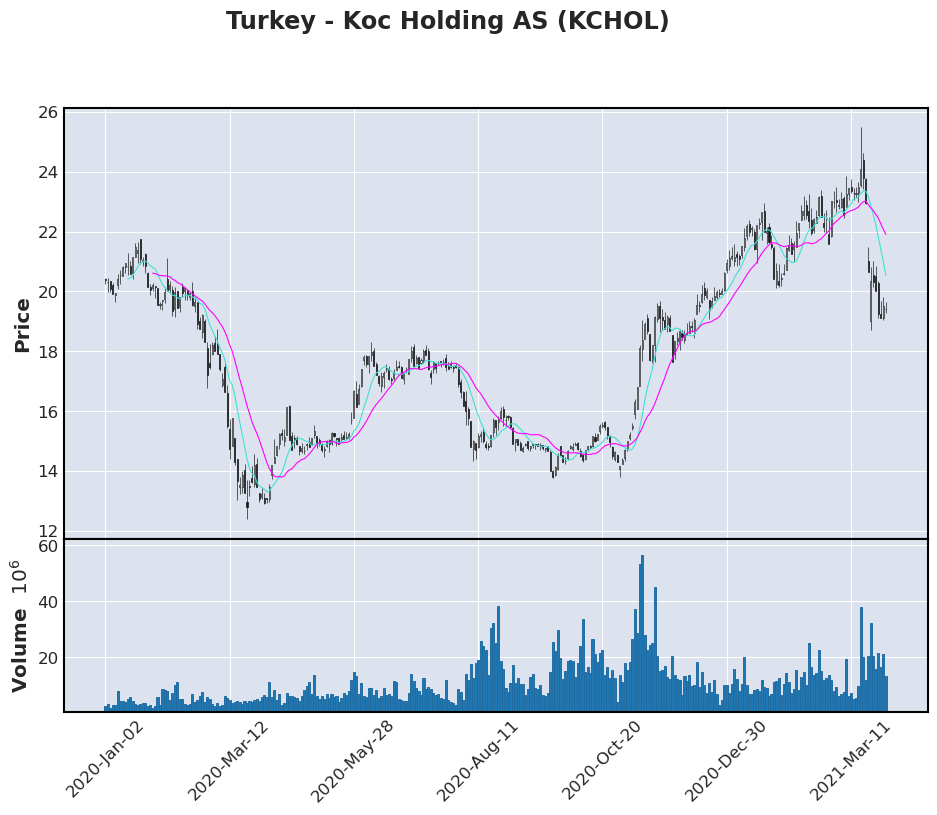

In [15]:
if not isinstance(Turkey.index, pd.core.indexes.datetimes.DatetimeIndex):
    Turkey.set_index("Date", inplace=True)

mpf.plot(Turkey, type='candle', volume=True, mav=(10, 20), figscale=1.5, title='Turkey - Koc Holding AS (KCHOL)')

In [16]:
# Filter data for 2020 Q1, Q2, Q3, Q4
start_date = '2020-01-01'
end_date = '2020-12-31'
filtered_data = Turkey.loc[(Turkey.index >= start_date) & (Turkey.index <= end_date)].copy()

# Compute moving averages
window_sizes = [7, 30, 90]
for window_size in window_sizes:
    col_name = f'{window_size}-day Moving Average'
    filtered_data.loc[:, col_name] = filtered_data['Close'].rolling(window=window_size).mean()

# Fill NaN values in 30-day and 90-day moving averages with values from 7-day moving average
filtered_data['7-day Moving Average'].fillna(filtered_data['Close'], inplace=True)
filtered_data['30-day Moving Average'].fillna(filtered_data['7-day Moving Average'], inplace=True)
filtered_data['90-day Moving Average'].fillna(filtered_data['7-day Moving Average'], inplace=True)

# Drop rows with NaN values
filtered_data.dropna(inplace=True)

# Define the features and target
features = filtered_data[['7-day Moving Average', '30-day Moving Average', '90-day Moving Average']]
target = filtered_data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create and train the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

Mean Squared Error: 0.2796218897591536
R-squared score: 0.9440169149264764


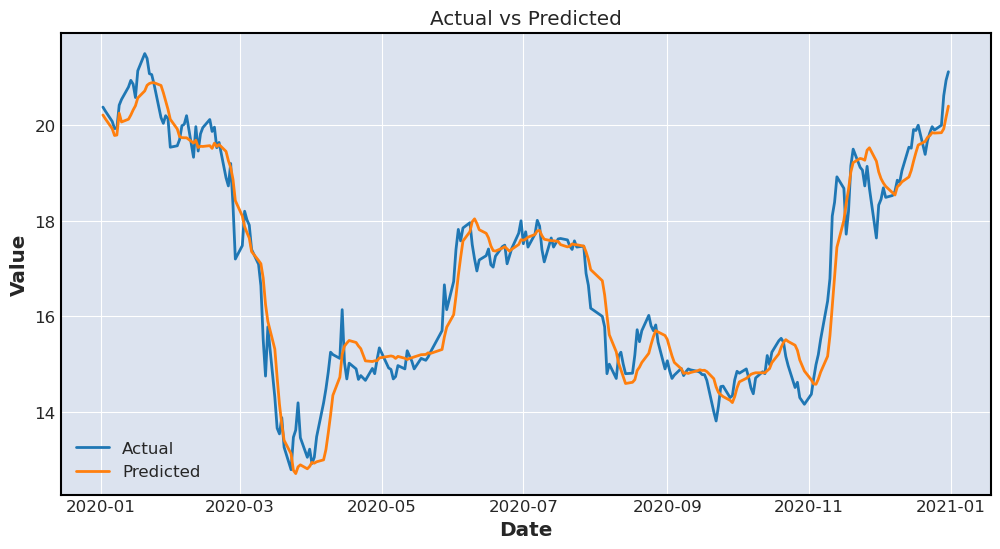

Mean Squared Error: 0.2796218897591536
R-squared score: 0.9440169149264764


In [17]:
# Increase the figure size
plt.figure(figsize=(12, 6))

# Plotting actual values
plt.plot(filtered_data.index, target, label='Actual')

# Plotting predicted values
plt.plot(filtered_data.index, regressor.predict(features), label='Predicted')


# Set labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Predicted')

# Add legend
plt.legend()

# Display the plot
plt.show()
print(f"Mean Squared Error: {mse}")
print("R-squared score:", r2)

In [18]:

# Filter data for Q1 2021
start_date21 = '2021-01-01'
end_date21 = '2021-03-31'
q1_data = Turkey.loc[(Turkey.index >= start_date21) & (Turkey.index <= end_date21)].copy()

# Compute moving averages for Q1 2021
window_sizes21 = [7, 30, 90]
for window_size21 in window_sizes21:
    col_name = f'{window_size21}-day Moving Average'
    q1_data[col_name] = q1_data['Close'].rolling(window=window_size21).mean()

# Fill NaN values in 30-day and 90-day moving averages with values from 7-day moving average
q1_data['30-day Moving Average'].fillna(q1_data['7-day Moving Average'], inplace=True)
q1_data['90-day Moving Average'].fillna(q1_data['7-day Moving Average'], inplace=True)

# Drop rows with NaN values
q1_data.dropna(inplace=True)

# Check if there are samples for Q1 2021 after dropping NaN values
if q1_data.shape[0] < 1:
    print("No data available for Q1 2021.")
else:
    # Define the features and target for Q1 2021
    q1_features = q1_data[['7-day Moving Average', '30-day Moving Average', '90-day Moving Average']]
    q1_target = q1_data['Close']

    # Make predictions for Q1 2021
    q1_predictions = regressor.predict(q1_features)  # Assuming 'regressor' is your trained model

    # Evaluate the model using Mean Squared Error (MSE) for Q1 2021
    q1_mse = mean_squared_error(q1_target, q1_predictions)
    print(f"Mean Squared Error (Q1 2021): {q1_mse}")
    
    # Calculate R-squared score
    r2 = r2_score(y_test, y_pred)
    print("R-squared score:", r2)


Mean Squared Error (Q1 2021): 0.5529523641626547
R-squared score: 0.9440169149264764


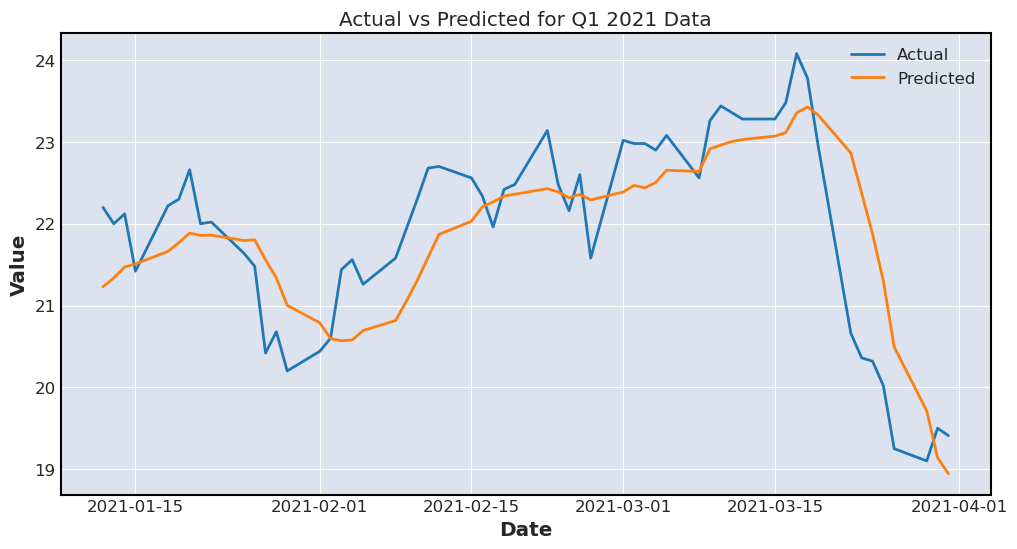

Mean Squared Error (Q1 2021): 0.5529523641626547
R-squared score: 0.9440169149264764


In [19]:
import matplotlib.pyplot as plt

# Increase the figure size
plt.figure(figsize=(12, 6))

# Plotting actual values
plt.plot(q1_data.index, q1_target, label='Actual')

# Plotting predicted values
plt.plot(q1_data.index, q1_predictions, label='Predicted')


# Set labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Predicted for Q1 2021 Data')

# Add legend
plt.legend()

# Display the plot
plt.show()

print(f"Mean Squared Error (Q1 2021): {q1_mse}")
print("R-squared score:", r2)

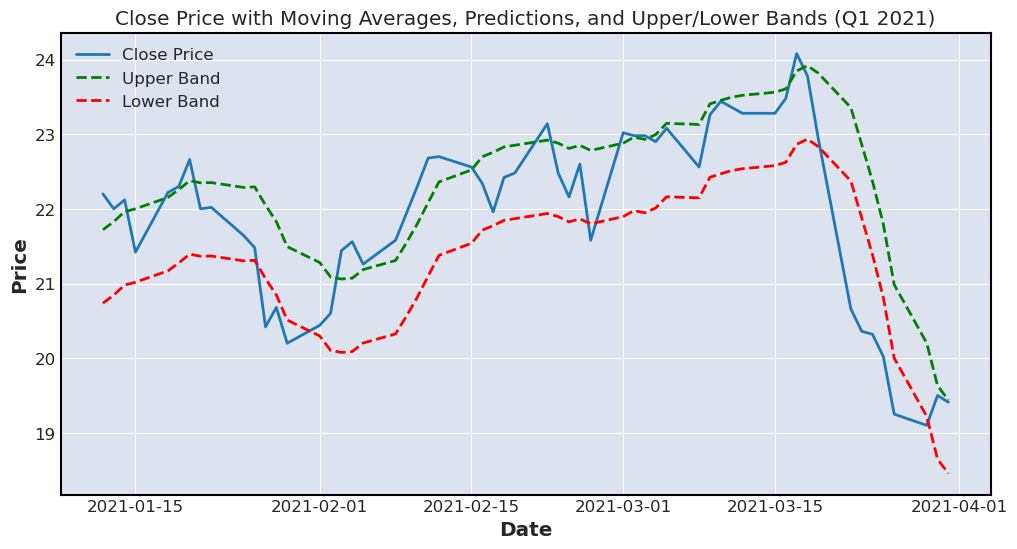

In [20]:

    # Calculate upper and lower bands based on the predictions
    rstd = q1_predictions.std()  # Calculating the residual standard deviation
    upper_band = q1_predictions + (.5 * rstd)
    lower_band = q1_predictions - (.5 * rstd)

    # Plot close prices with upper and lower bands
    plt.figure(figsize=(12, 6))
    plt.plot(q1_data.index, q1_data['Close'], label='Close Price')
    plt.plot(q1_data.index, upper_band, label='Upper Band', linestyle='--', color='g')
    plt.plot(q1_data.index, lower_band, label='Lower Band', linestyle='--', color='r')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Close Price with Moving Averages, Predictions, and Upper/Lower Bands (Q1 2021)')
    plt.legend()
    plt.show()
 

In [21]:
# Calculate upper and lower bands based on the predictions
rstd = q1_predictions.std()  # Calculating the residual standard deviation
upper_band =pd.DataFrame(q1_predictions + (.5 * rstd))
lower_band = pd.DataFrame(q1_predictions - (.5 * rstd))

# Create a new column to store the classification labels
q1_data['Classification'] = 'Hold'

# Iterate over the data and classify based on intersections
for i in range(1, q1_data.shape[0]):
    if q1_data['Close'].iloc[i] > upper_band.iloc[i][0] and q1_data['Close'].iloc[i - 1] <= upper_band.iloc[i - 1][0]:
        q1_data['Classification'].iloc[i] = 'Sell'
    elif q1_data['Close'].iloc[i] < lower_band.iloc[i][0] and q1_data['Close'].iloc[i - 1] >= lower_band.iloc[i - 1][0]:
        q1_data['Classification'].iloc[i] = 'Buy'

# Print the data with classification labels
print(q1_data[['Close', '30-day Moving Average', '90-day Moving Average', 'Classification']])

            Close  30-day Moving Average  90-day Moving Average Classification
Date                                                                          
2021-01-12  22.20              21.442857              21.442857           Hold
2021-01-13  22.00              21.557143              21.557143           Hold
2021-01-14  22.12              21.697143              21.697143           Hold
2021-01-15  21.42              21.737143              21.737143           Hold
2021-01-18  22.22              21.897143              21.897143           Sell
2021-01-19  22.30              22.008571              22.008571           Hold
2021-01-20  22.66              22.131429              22.131429           Hold
2021-01-21  22.00              22.102857              22.102857           Hold
2021-01-22  22.02              22.105714              22.105714           Hold
2021-01-25  21.64              22.037143              22.037143           Hold
2021-01-26  21.48              22.045714            

/tmp/ipykernel_20/757242668.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_20/757242668.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [22]:

# Add this line to display plots inline
%matplotlib inline

# Create traces for the buy/sell signals
buy_signals = go.Scatter(
    x=q1_data[q1_data['Classification'] == 'Buy'].index,
    y=q1_data[q1_data['Classification'] == 'Buy']['Close'],
    mode='markers',
    marker=dict(symbol='triangle-up', size=10, color='green'),
    name='Buy Signals'
)
sell_signals = go.Scatter(
    x=q1_data[q1_data['Classification'] == 'Sell'].index,
    y=q1_data[q1_data['Classification'] == 'Sell']['Close'],
    mode='markers',
    marker=dict(symbol='triangle-down', size=10, color='red'),
    name='Sell Signals'
)

# Trace for the actual price
actual_price = go.Scatter(
    x=q1_data.index,
    y=q1_data['Close'],
    mode='lines',
    name='Actual Price'
)

# Create the layout
layout = go.Layout(
    title='Turkey Stock Price with Buy/Sell Signals',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Price')
)

# Create the data variable and include all the traces
data = [actual_price, buy_signals, sell_signals]

# Create the figure and plot
fig = go.Figure(data=data, layout=layout)

# Change this line to specify the rendering method as an iframe
fig.show(renderer='iframe')

# Export the plot to an HTML file
plot(fig, filename='TurkeyStockPlot.html')

'TurkeyStockPlot.html'

**Egypt - Medinet Nasr Housing (M**

In [23]:
# Load the Excel file
file_path = '/kaggle/input/stockprice/2020Q1Q2Q3Q4-2021Q1.xlsx'
Egypt = pd.read_excel(file_path, sheet_name='Egypt - Medinet Nasr Housing (M')  

# Convert date column to datetime format
Egypt['Date'] = pd.to_datetime(Egypt['Date'], infer_datetime_format=True, errors='coerce')


# Sort the data chronologically based on date
Egypt = Egypt.sort_values('Date')


# Print the updated DataFrame
print(Egypt.head())
print(Egypt.info())

          Date Price  Open  High   Low     Vol.  Change %
304 2020-01-02  4.81  4.81  4.87  4.78  241.60K   -0.0021
303 2020-01-05  4.41   4.7   4.7  4.33    3.76M   -0.0832
302 2020-01-06  4.28  4.16  4.44  4.12    2.52M   -0.0295
301 2020-01-08  4.41  4.19  4.59  4.15    3.52M    0.0304
300 2020-01-09  4.62  4.55   4.7  4.55    2.09M    0.0476
<class 'pandas.core.frame.DataFrame'>
Int64Index: 306 entries, 304 to 305
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      305 non-null    datetime64[ns]
 1   Price     306 non-null    object        
 2   Open      306 non-null    object        
 3   High      306 non-null    object        
 4   Low       306 non-null    object        
 5   Vol.      305 non-null    object        
 6   Change %  305 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 19.1+ KB
None


In [24]:
# Define a function to convert the string representation to a float value
def convert_volume(volume):
    if isinstance(volume, float):
        return volume
    elif volume == '-':
        return 0.0  # Set the value to 0 for the '-' case
    elif 'K' in volume:
        return float(volume.replace('K', '')) * 1000
    elif 'M' in volume:
        return float(volume.replace('M', '')) * 1000000
    else:
        return float(volume)
    
# Replace missing values with a default value (e.g., 0.0)
Egypt['Vol.'] = Egypt['Vol.'].fillna(0.0)

# Apply the conversion function to the "Volume" column
Egypt['Vol.'] = Egypt['Vol.'].apply(convert_volume)

# Convert the "Volume" column to float type
Egypt['Vol.'] = Egypt['Vol.'].astype(float)

Egypt.rename(columns={'Vol.': 'Volume'}, inplace=True)

# Drop row 305
Egypt = Egypt.drop(index=305)


# Convert Price, Open, High, Low columns to float 
for col in ['Price', 'Open', 'High', 'Low']:
    Egypt[col] = Egypt[col].astype(float)
   
Egypt.rename(columns={'Price': 'Close'}, inplace=True)

# Print the updated DataFrame
print(Egypt.head(),'\n')
print(Egypt.info(),'\n')

          Date  Close  Open  High   Low     Volume  Change %
304 2020-01-02   4.81  4.81  4.87  4.78   241600.0   -0.0021
303 2020-01-05   4.41  4.70  4.70  4.33  3760000.0   -0.0832
302 2020-01-06   4.28  4.16  4.44  4.12  2520000.0   -0.0295
301 2020-01-08   4.41  4.19  4.59  4.15  3520000.0    0.0304
300 2020-01-09   4.62  4.55  4.70  4.55  2090000.0    0.0476 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305 entries, 304 to 0
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      305 non-null    datetime64[ns]
 1   Close     305 non-null    float64       
 2   Open      305 non-null    float64       
 3   High      305 non-null    float64       
 4   Low       305 non-null    float64       
 5   Volume    305 non-null    float64       
 6   Change %  305 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 19.1 KB
None 



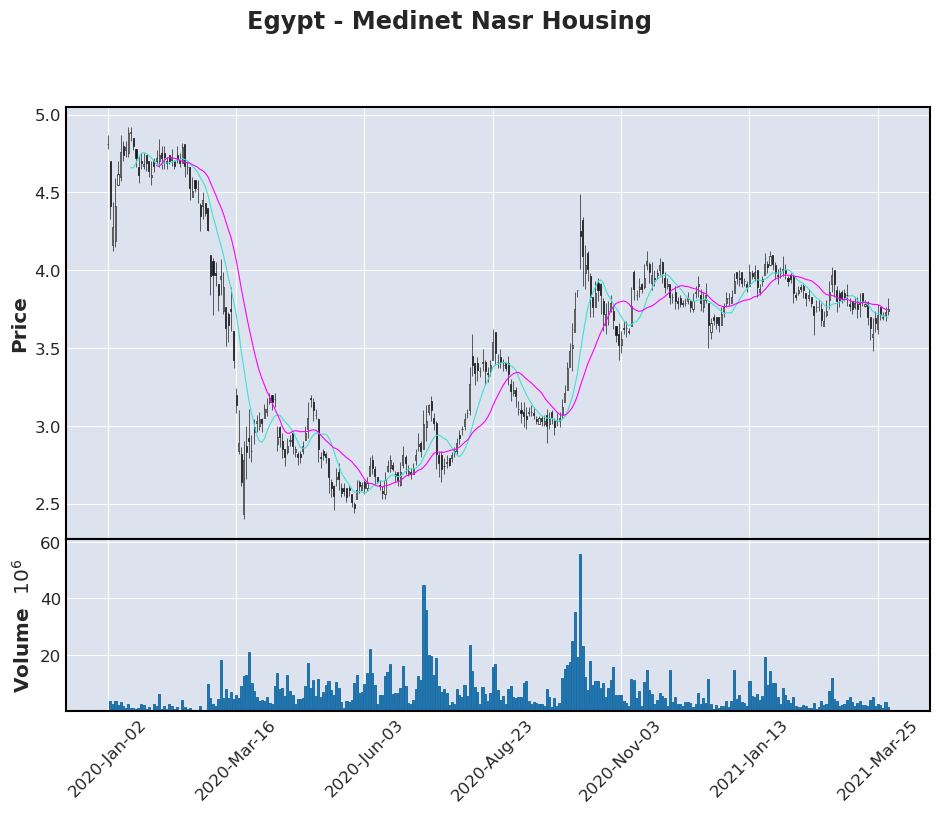

In [25]:
if not isinstance(Egypt.index, pd.core.indexes.datetimes.DatetimeIndex):
    Egypt.set_index("Date", inplace=True)

mpf.plot(Egypt, type='candle', volume=True, mav=(10, 20), figscale=1.5, title='Egypt - Medinet Nasr Housing')

In [26]:
# Filter data for 2020 Q1, Q2, Q3, Q4
start_date = '2020-01-01'
end_date = '2020-12-31'
filtered_data = Egypt.loc[(Egypt.index >= start_date) & (Egypt.index <= end_date)].copy()

# Compute moving averages
window_sizes = [7, 30, 90]
for window_size in window_sizes:
    col_name = f'{window_size}-day Moving Average'
    filtered_data.loc[:, col_name] = filtered_data['Close'].rolling(window=window_size).mean()

# Fill NaN values in 30-day and 90-day moving averages with values from 7-day moving average
filtered_data['7-day Moving Average'].fillna(filtered_data['Close'], inplace=True)
filtered_data['30-day Moving Average'].fillna(filtered_data['7-day Moving Average'], inplace=True)
filtered_data['90-day Moving Average'].fillna(filtered_data['7-day Moving Average'], inplace=True)

# Drop rows with NaN values
filtered_data.dropna(inplace=True)

# Define the features and target
features = filtered_data[['7-day Moving Average', '30-day Moving Average', '90-day Moving Average']]
target = filtered_data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create and train the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

Mean Squared Error: 0.010916023307839294
R-squared score: 0.980390960231434


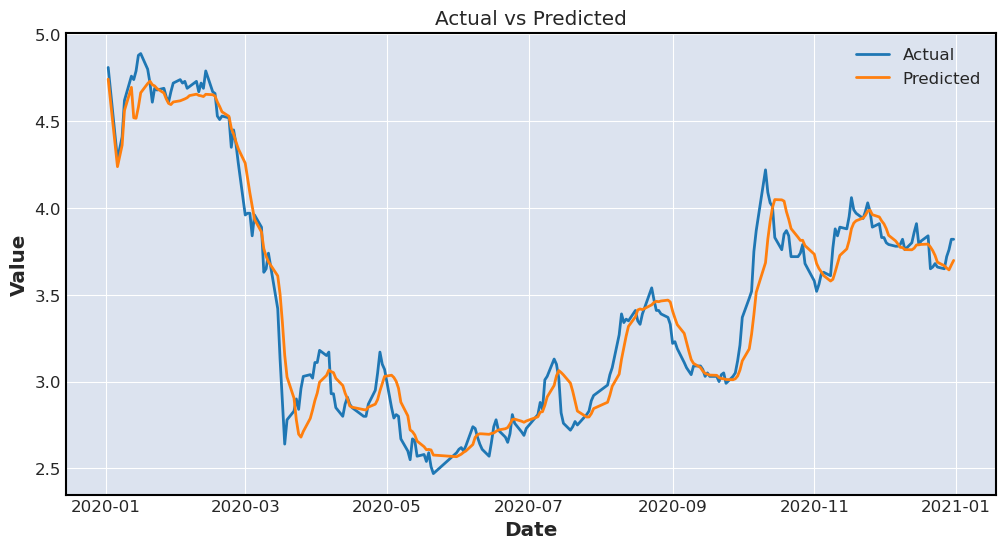

Mean Squared Error: 0.010916023307839294
R-squared score: 0.980390960231434


In [27]:
# Increase the figure size
plt.figure(figsize=(12, 6))

# Plotting actual values
plt.plot(filtered_data.index, target, label='Actual')

# Plotting predicted values
plt.plot(filtered_data.index, regressor.predict(features), label='Predicted')


# Set labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Predicted')

# Add legend
plt.legend()

# Display the plot
plt.show()
print(f"Mean Squared Error: {mse}")
print("R-squared score:", r2)

In [28]:

# Filter data for Q1 2021
start_date21 = '2021-01-01'
end_date21 = '2021-03-31'
q1_data = Egypt.loc[(Egypt.index >= start_date21) & (Egypt.index <= end_date21)].copy()

# Compute moving averages for Q1 2021
window_sizes21 = [7, 30, 90]
for window_size21 in window_sizes21:
    col_name = f'{window_size21}-day Moving Average'
    q1_data[col_name] = q1_data['Close'].rolling(window=window_size21).mean()

# Fill NaN values in 30-day and 90-day moving averages with values from 7-day moving average
q1_data['30-day Moving Average'].fillna(q1_data['7-day Moving Average'], inplace=True)
q1_data['90-day Moving Average'].fillna(q1_data['7-day Moving Average'], inplace=True)

# Drop rows with NaN values
q1_data.dropna(inplace=True)

# Check if there are samples for Q1 2021 after dropping NaN values
if q1_data.shape[0] < 1:
    print("No data available for Q1 2021.")
else:
    # Define the features and target for Q1 2021
    q1_features = q1_data[['7-day Moving Average', '30-day Moving Average', '90-day Moving Average']]
    q1_target = q1_data['Close']

    # Make predictions for Q1 2021
    q1_predictions = regressor.predict(q1_features)  # Assuming 'regressor' is your trained model

    # Evaluate the model using Mean Squared Error (MSE) for Q1 2021
    q1_mse = mean_squared_error(q1_target, q1_predictions)
    print(f"Mean Squared Error (Q1 2021): {q1_mse}")
    
    # Calculate R-squared score
    r2 = r2_score(y_test, y_pred)
    print("R-squared score:", r2)

Mean Squared Error (Q1 2021): 0.004262963252100137
R-squared score: 0.980390960231434


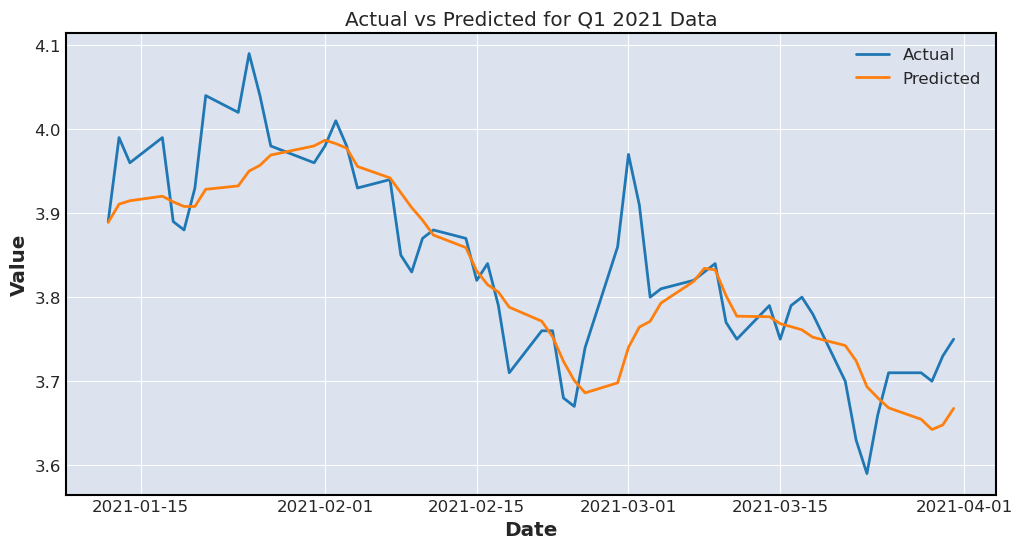

Mean Squared Error (Q1 2021): 0.004262963252100137
R-squared score: 0.980390960231434


In [29]:
import matplotlib.pyplot as plt

# Increase the figure size
plt.figure(figsize=(12, 6))

# Plotting actual values
plt.plot(q1_data.index, q1_target, label='Actual')

# Plotting predicted values
plt.plot(q1_data.index, q1_predictions, label='Predicted')


# Set labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Predicted for Q1 2021 Data')

# Add legend
plt.legend()

# Display the plot
plt.show()

print(f"Mean Squared Error (Q1 2021): {q1_mse}")
print("R-squared score:", r2)

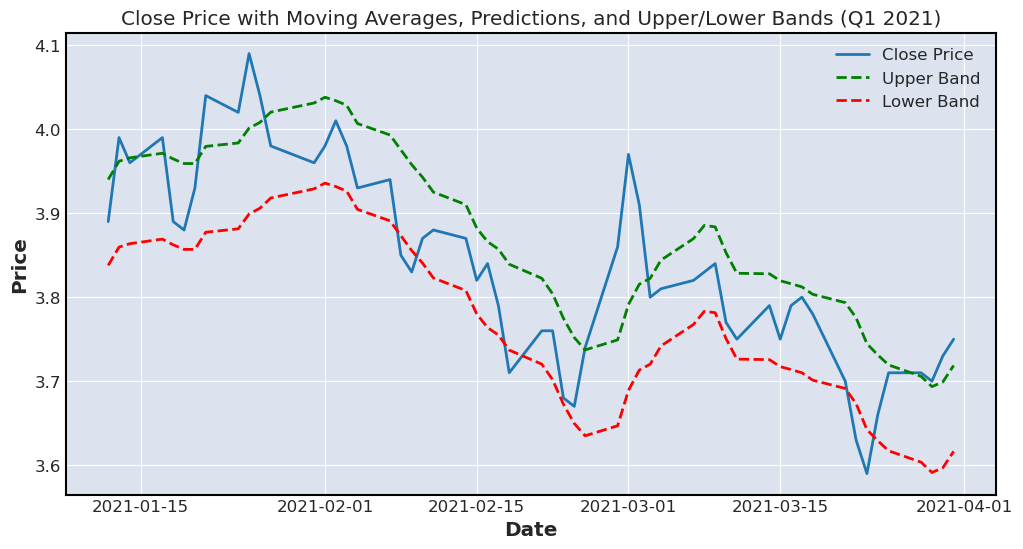

In [30]:

    # Calculate upper and lower bands based on the predictions
    rstd = q1_predictions.std()  # Calculating the residual standard deviation
    upper_band = q1_predictions + (.5 * rstd)
    lower_band = q1_predictions - (.5 * rstd)

    # Plot close prices with upper and lower bands
    plt.figure(figsize=(12, 6))
    plt.plot(q1_data.index, q1_data['Close'], label='Close Price')
    plt.plot(q1_data.index, upper_band, label='Upper Band', linestyle='--', color='g')
    plt.plot(q1_data.index, lower_band, label='Lower Band', linestyle='--', color='r')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Close Price with Moving Averages, Predictions, and Upper/Lower Bands (Q1 2021)')
    plt.legend()
    plt.show()
 

In [31]:
# Calculate upper and lower bands based on the predictions
rstd = q1_predictions.std()  # Calculating the residual standard deviation
upper_band =pd.DataFrame(q1_predictions + (.5 * rstd))
lower_band = pd.DataFrame(q1_predictions - (.5 * rstd))

# Create a new column to store the classification labels
q1_data['Classification'] = 'Hold'

# Iterate over the data and classify based on intersections
for i in range(1, q1_data.shape[0]):
    if q1_data['Close'].iloc[i] > upper_band.iloc[i][0] and q1_data['Close'].iloc[i - 1] <= upper_band.iloc[i - 1][0]:
        q1_data['Classification'].iloc[i] = 'Sell'
    elif q1_data['Close'].iloc[i] < lower_band.iloc[i][0] and q1_data['Close'].iloc[i - 1] >= lower_band.iloc[i - 1][0]:
        q1_data['Classification'].iloc[i] = 'Buy'

# Print the data with classification labels
print(q1_data[['Close', '30-day Moving Average', '90-day Moving Average', 'Classification']])

            Close  30-day Moving Average  90-day Moving Average Classification
Date                                                                          
2021-01-12   3.89               3.912857               3.912857           Hold
2021-01-13   3.99               3.935714               3.935714           Sell
2021-01-14   3.96               3.940000               3.940000           Hold
2021-01-17   3.99               3.945714               3.945714           Sell
2021-01-18   3.89               3.938571               3.938571           Hold
2021-01-19   3.88               3.932857               3.932857           Hold
2021-01-20   3.93               3.932857               3.932857           Hold
2021-01-21   4.04               3.954286               3.954286           Sell
2021-01-24   4.02               3.958571               3.958571           Hold
2021-01-25   4.09               3.977143               3.977143           Hold
2021-01-26   4.04               3.984286            

/tmp/ipykernel_20/757242668.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_20/757242668.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [32]:
# Add this line to display plots inline
%matplotlib inline

# Create traces for the buy/sell signals
buy_signals = go.Scatter(
    x=q1_data[q1_data['Classification'] == 'Buy'].index,
    y=q1_data[q1_data['Classification'] == 'Buy']['Close'],
    mode='markers',
    marker=dict(symbol='triangle-up', size=10, color='green'),
    name='Buy Signals'
)
sell_signals = go.Scatter(
    x=q1_data[q1_data['Classification'] == 'Sell'].index,
    y=q1_data[q1_data['Classification'] == 'Sell']['Close'],
    mode='markers',
    marker=dict(symbol='triangle-down', size=10, color='red'),
    name='Sell Signals'
)

# Trace for the actual price
actual_price = go.Scatter(
    x=q1_data.index,
    y=q1_data['Close'],
    mode='lines',
    name='Actual Price'
)

# Create the layout
layout = go.Layout(
    title='EGEYPT Stock Price with Buy/Sell Signals',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Price')
)

# Create the data variable and include all the traces
data = [actual_price, buy_signals, sell_signals]

# Create the figure and plot
fig = go.Figure(data=data, layout=layout)

# Change this line to specify the rendering method as an iframe
fig.show(renderer='iframe')

# Export the plot to an HTML file
plot(fig, filename='EgyStockPlot.html')


'EgyStockPlot.html'

**Brazil - Minerva SABrazil**

In [33]:
# Load the Excel file
file_path = '/kaggle/input/stockprice/2020Q1Q2Q3Q4-2021Q1.xlsx'
Brazil = pd.read_excel(file_path, sheet_name='Brazil - Minerva SABrazil (BEEF')  

# Convert date column to datetime format
Brazil['Date'] = pd.to_datetime(Brazil['Date'], infer_datetime_format=True, errors='coerce')


# Sort the data chronologically based on date
Brazil = Brazil.sort_values('Date')


# Print the updated DataFrame
print(Brazil.head())
print(Brazil.info())

          Date  Price   Open   High    Low   Vol.  Change %
308 2020-01-02  12.57  12.88  12.99  12.57  5.78M   -0.0210
307 2020-01-03   12.9  12.45  12.93  12.27  4.88M    0.0263
306 2020-01-06  12.89   12.9  12.91  12.57  4.17M   -0.0008
305 2020-01-07  13.48  13.03  13.48  13.03  8.20M    0.0458
304 2020-01-08  13.63   13.5  13.68  13.18  6.18M    0.0111
<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 308 to 309
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      309 non-null    datetime64[ns]
 1   Price     310 non-null    object        
 2   Open      310 non-null    object        
 3   High      310 non-null    object        
 4   Low       310 non-null    object        
 5   Vol.      309 non-null    object        
 6   Change %  309 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 19.4+ KB
None


In [34]:
# Define a function to convert the string representation to a float value
def convert_volume(volume):
    if isinstance(volume, float):
        return volume
    elif volume == '-':
        return 0.0  # Set the value to 0 for the '-' case
    elif 'K' in volume:
        return float(volume.replace('K', '')) * 1000
    elif 'M' in volume:
        return float(volume.replace('M', '')) * 1000000
    else:
        return float(volume)
    
# Replace missing values with a default value (e.g., 0.0)
Brazil['Vol.'] = Brazil['Vol.'].fillna(0.0)

# Apply the conversion function to the "Volume" column
Brazil['Vol.'] = Brazil['Vol.'].apply(convert_volume)

# Convert the "Volume" column to float type
Brazil['Vol.'] = Brazil['Vol.'].astype(float)

Brazil.rename(columns={'Vol.': 'Volume'}, inplace=True)

# Drop row 309
Brazil = Brazil.drop(index=309)


# Convert Price, Open, High, Low columns to float 
for col in ['Price', 'Open', 'High', 'Low']:
    Brazil[col] = Brazil[col].astype(float)
   
Brazil.rename(columns={'Price': 'Close'}, inplace=True)

# Print the updated DataFrame
print(Brazil.head(),'\n')
print(Brazil.info(),'\n')

          Date  Close   Open   High    Low     Volume  Change %
308 2020-01-02  12.57  12.88  12.99  12.57  5780000.0   -0.0210
307 2020-01-03  12.90  12.45  12.93  12.27  4880000.0    0.0263
306 2020-01-06  12.89  12.90  12.91  12.57  4170000.0   -0.0008
305 2020-01-07  13.48  13.03  13.48  13.03  8200000.0    0.0458
304 2020-01-08  13.63  13.50  13.68  13.18  6180000.0    0.0111 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309 entries, 308 to 0
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      309 non-null    datetime64[ns]
 1   Close     309 non-null    float64       
 2   Open      309 non-null    float64       
 3   High      309 non-null    float64       
 4   Low       309 non-null    float64       
 5   Volume    309 non-null    float64       
 6   Change %  309 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 19.3 KB
None 



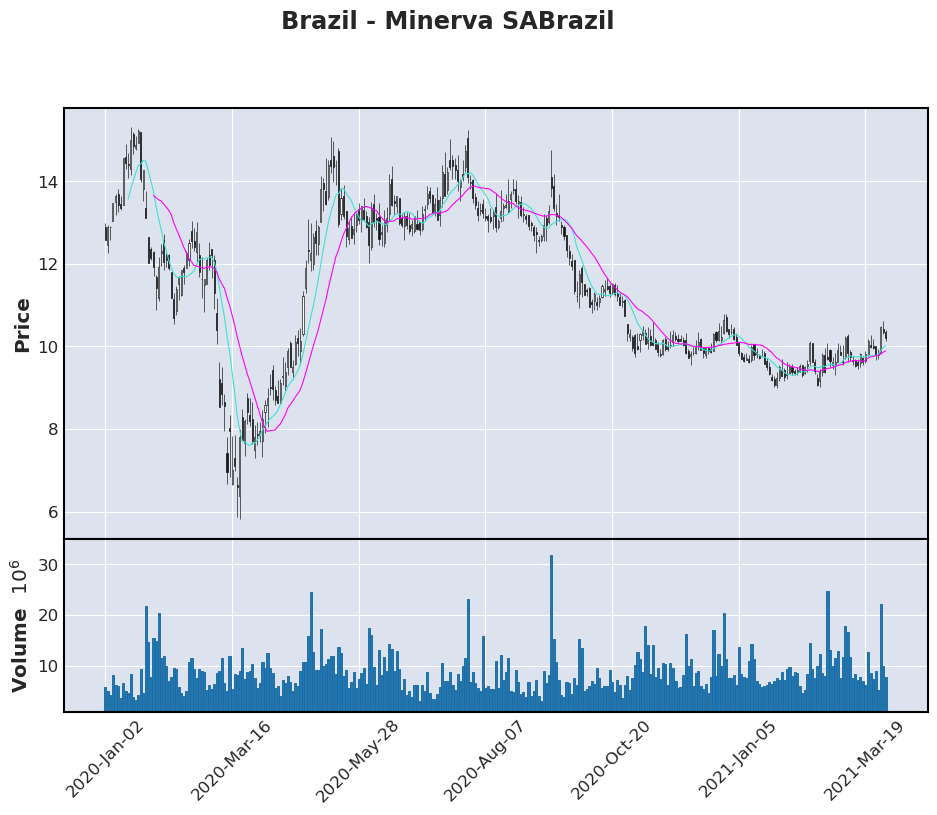

In [35]:
if not isinstance(Brazil.index, pd.core.indexes.datetimes.DatetimeIndex):
    Brazil.set_index("Date", inplace=True)

mpf.plot(Brazil, type='candle', volume=True, mav=(10, 20), figscale=1.5, title='Brazil - Minerva SABrazil')

In [36]:
# Filter data for 2020 Q1, Q2, Q3, Q4
start_date = '2020-01-01'
end_date = '2020-12-31'
filtered_data = Brazil.loc[(Brazil.index >= start_date) & (Brazil.index <= end_date)].copy()

# Compute moving averages
window_sizes = [7, 30, 90]
for window_size in window_sizes:
    col_name = f'{window_size}-day Moving Average'
    filtered_data.loc[:, col_name] = filtered_data['Close'].rolling(window=window_size).mean()

# Fill NaN values in 30-day and 90-day moving averages with values from 7-day moving average
filtered_data['7-day Moving Average'].fillna(filtered_data['Close'], inplace=True)
filtered_data['30-day Moving Average'].fillna(filtered_data['7-day Moving Average'], inplace=True)
filtered_data['90-day Moving Average'].fillna(filtered_data['7-day Moving Average'], inplace=True)

# Drop rows with NaN values
filtered_data.dropna(inplace=True)

# Define the features and target
features = filtered_data[['7-day Moving Average', '30-day Moving Average', '90-day Moving Average']]
target = filtered_data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create and train the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)


Mean Squared Error: 0.41614315441647626
R-squared score: 0.8589465043889437


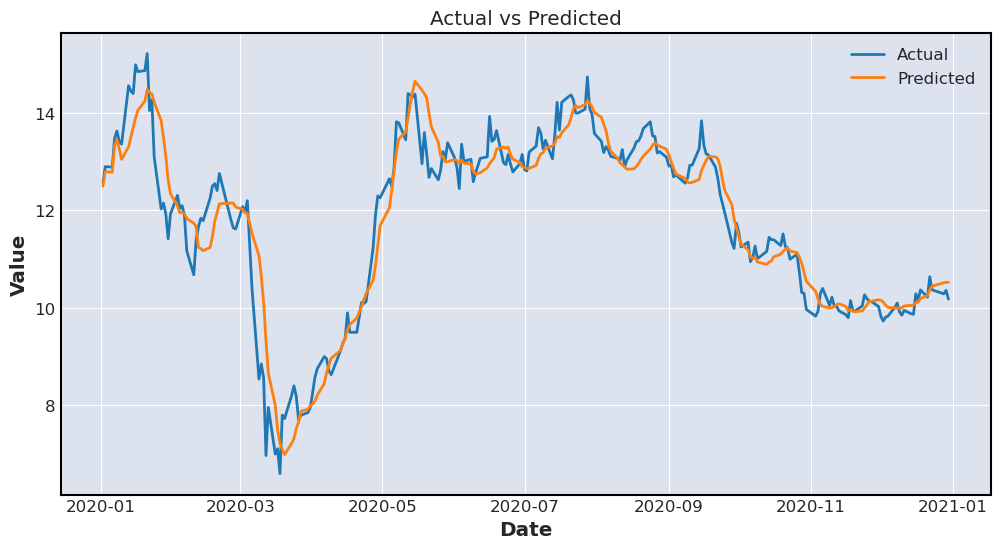

Mean Squared Error: 0.41614315441647626
R-squared score: 0.8589465043889437


In [37]:
# Increase the figure size
plt.figure(figsize=(12, 6))

# Plotting actual values
plt.plot(filtered_data.index, target, label='Actual')

# Plotting predicted values
plt.plot(filtered_data.index, regressor.predict(features), label='Predicted')


# Set labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Predicted')

# Add legend
plt.legend()

# Display the plot
plt.show()
print(f"Mean Squared Error: {mse}")
print("R-squared score:", r2)

In [38]:

# Filter data for Q1 2021
start_date21 = '2021-01-01'
end_date21 = '2021-03-31'
q1_data = Brazil.loc[(Brazil.index >= start_date21) & (Brazil.index <= end_date21)].copy()

# Compute moving averages for Q1 2021
window_sizes21 = [7, 30, 90]
for window_size21 in window_sizes21:
    col_name = f'{window_size21}-day Moving Average'
    q1_data[col_name] = q1_data['Close'].rolling(window=window_size21).mean()

# Fill NaN values in 30-day and 90-day moving averages with values from 7-day moving average
q1_data['30-day Moving Average'].fillna(q1_data['7-day Moving Average'], inplace=True)
q1_data['90-day Moving Average'].fillna(q1_data['7-day Moving Average'], inplace=True)

# Drop rows with NaN values
q1_data.dropna(inplace=True)

# Check if there are samples for Q1 2021 after dropping NaN values
if q1_data.shape[0] < 1:
    print("No data available for Q1 2021.")
else:
    # Define the features and target for Q1 2021
    q1_features = q1_data[['7-day Moving Average', '30-day Moving Average', '90-day Moving Average']]
    q1_target = q1_data['Close']

    # Make predictions for Q1 2021
    q1_predictions = regressor.predict(q1_features)  # Assuming 'regressor' is your trained model

    # Evaluate the model using Mean Squared Error (MSE) for Q1 2021
    q1_mse = mean_squared_error(q1_target, q1_predictions)
    print(f"Mean Squared Error (Q1 2021): {q1_mse}")
    
    # Calculate R-squared score
    r2 = r2_score(y_test, y_pred)
    print("R-squared score:", r2)


Mean Squared Error (Q1 2021): 0.08055987915919115
R-squared score: 0.8589465043889437


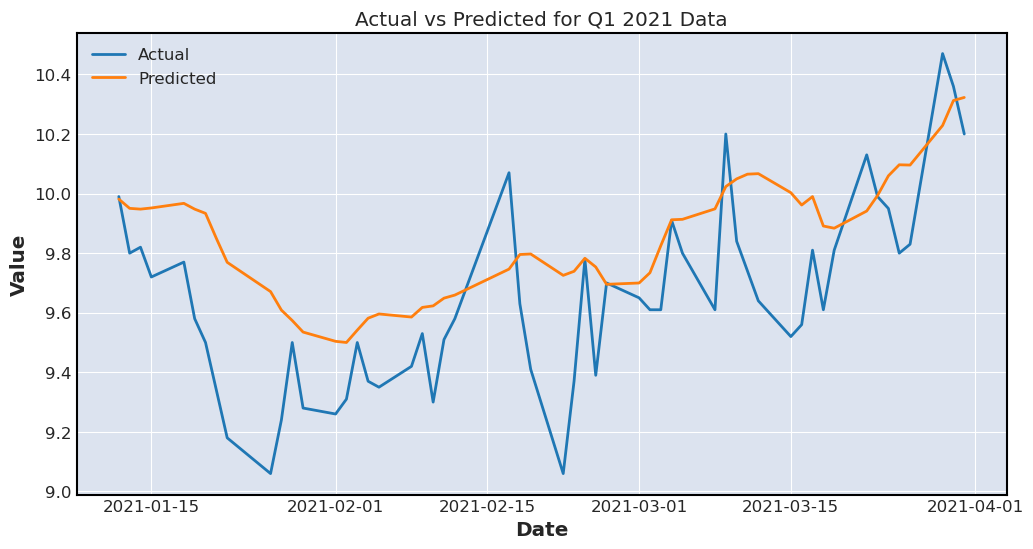

Mean Squared Error (Q1 2021): 0.08055987915919115
R-squared score: 0.8589465043889437


In [39]:
import matplotlib.pyplot as plt

# Increase the figure size
plt.figure(figsize=(12, 6))

# Plotting actual values
plt.plot(q1_data.index, q1_target, label='Actual')

# Plotting predicted values
plt.plot(q1_data.index, q1_predictions, label='Predicted')


# Set labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Predicted for Q1 2021 Data')

# Add legend
plt.legend()

# Display the plot
plt.show()

print(f"Mean Squared Error (Q1 2021): {q1_mse}")
print("R-squared score:", r2)

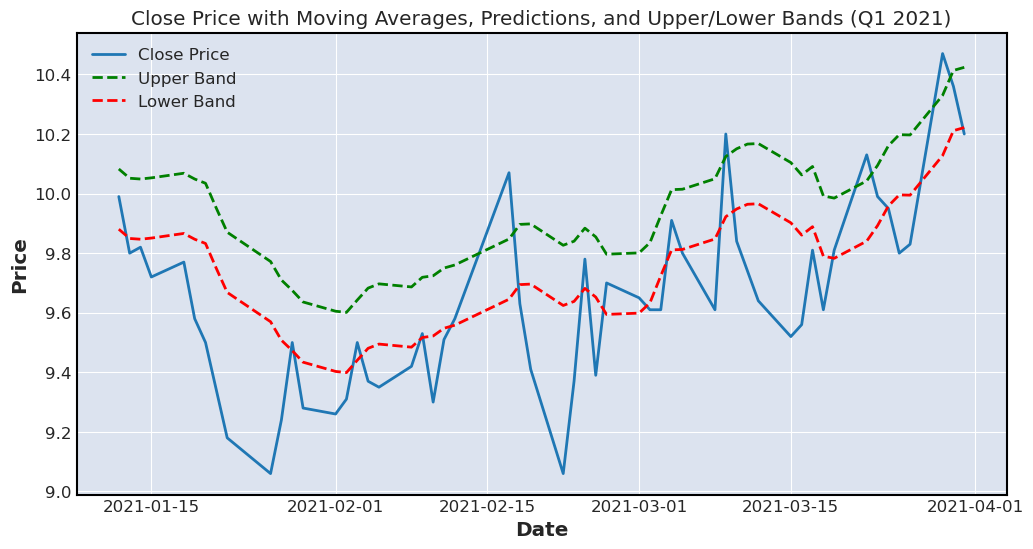

In [40]:

    # Calculate upper and lower bands based on the predictions
    rstd = q1_predictions.std()  # Calculating the residual standard deviation
    upper_band = q1_predictions + (.5 * rstd)
    lower_band = q1_predictions - (.5 * rstd)

    # Plot close prices with upper and lower bands
    plt.figure(figsize=(12, 6))
    plt.plot(q1_data.index, q1_data['Close'], label='Close Price')
    plt.plot(q1_data.index, upper_band, label='Upper Band', linestyle='--', color='g')
    plt.plot(q1_data.index, lower_band, label='Lower Band', linestyle='--', color='r')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Close Price with Moving Averages, Predictions, and Upper/Lower Bands (Q1 2021)')
    plt.legend()
    plt.show()
 

In [41]:
# Calculate upper and lower bands based on the predictions
rstd = q1_predictions.std()  # Calculating the residual standard deviation
upper_band =pd.DataFrame(q1_predictions + (.5 * rstd))
lower_band = pd.DataFrame(q1_predictions - (.5 * rstd))

# Create a new column to store the classification labels
q1_data['Classification'] = 'Hold'

# Iterate over the data and classify based on intersections
for i in range(1, q1_data.shape[0]):
    if q1_data['Close'].iloc[i] > upper_band.iloc[i][0] and q1_data['Close'].iloc[i - 1] <= upper_band.iloc[i - 1][0]:
        q1_data['Classification'].iloc[i] = 'Sell'
    elif q1_data['Close'].iloc[i] < lower_band.iloc[i][0] and q1_data['Close'].iloc[i - 1] >= lower_band.iloc[i - 1][0]:
        q1_data['Classification'].iloc[i] = 'Buy'

# Print the data with classification labels
print(q1_data[['Close', '30-day Moving Average', '90-day Moving Average', 'Classification']])

            Close  30-day Moving Average  90-day Moving Average Classification
Date                                                                          
2021-01-12   9.99               9.792857               9.792857           Hold
2021-01-13   9.80               9.758571               9.758571            Buy
2021-01-14   9.82               9.755714               9.755714           Hold
2021-01-15   9.72               9.760000               9.760000           Hold
2021-01-18   9.77               9.777143               9.777143           Hold
2021-01-19   9.58               9.755714               9.755714           Hold
2021-01-20   9.50               9.740000               9.740000           Hold
2021-01-21   9.34               9.647143               9.647143           Hold
2021-01-22   9.18               9.558571               9.558571           Hold
2021-01-26   9.06               9.450000               9.450000           Hold
2021-01-27   9.24               9.381429            

/tmp/ipykernel_20/757242668.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_20/757242668.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [42]:
# Add this line to display plots inline
%matplotlib inline

# Create traces for the buy/sell signals
buy_signals = go.Scatter(
    x=q1_data[q1_data['Classification'] == 'Buy'].index,
    y=q1_data[q1_data['Classification'] == 'Buy']['Close'],
    mode='markers',
    marker=dict(symbol='triangle-up', size=10, color='green'),
    name='Buy Signals'
)
sell_signals = go.Scatter(
    x=q1_data[q1_data['Classification'] == 'Sell'].index,
    y=q1_data[q1_data['Classification'] == 'Sell']['Close'],
    mode='markers',
    marker=dict(symbol='triangle-down', size=10, color='red'),
    name='Sell Signals'
)

# Trace for the actual price
actual_price = go.Scatter(
    x=q1_data.index,
    y=q1_data['Close'],
    mode='lines',
    name='Actual Price'
)

# Create the layout
layout = go.Layout(
    title='Brazil Stock Price with Buy/Sell Signals',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Price')
)

# Create the data variable and include all the traces
data = [actual_price, buy_signals, sell_signals]

# Create the figure and plot
fig = go.Figure(data=data, layout=layout)

# Change this line to specify the rendering method as an iframe
fig.show(renderer='iframe')

# Export the plot to an HTML file
plot(fig, filename='BrazilStockPlot.html')


'BrazilStockPlot.html'

**Argentina - Pampa Energia SA**

In [43]:
# Load the Excel file
file_path = '/kaggle/input/stockprice/2020Q1Q2Q3Q4-2021Q1.xlsx'
Argentina = pd.read_excel(file_path, sheet_name='Argentina - Pampa Energia SA (P')  

# Convert date column to datetime format
Argentina['Date'] = pd.to_datetime(Argentina['Date'], infer_datetime_format=True, errors='coerce')


# Sort the data chronologically based on date
Argentina = Argentina.sort_values('Date')


# Print the updated DataFrame
print(Argentina.head())
print(Argentina.info())

          Date  Price   Open   High    Low     Vol.  Change %
299 2020-01-02  48.25  49.35   50.2  47.55  878.50K   -0.0292
298 2020-01-03   48.8  48.25  49.45   46.5  595.36K    0.0114
297 2020-01-06   48.5   48.4   48.7     47  719.24K   -0.0061
296 2020-01-07   47.6  48.35     49   46.9  901.95K   -0.0186
295 2020-01-08   46.5   47.5   47.5     46    1.18M   -0.0231
<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 299 to 300
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      300 non-null    datetime64[ns]
 1   Price     301 non-null    object        
 2   Open      301 non-null    object        
 3   High      301 non-null    object        
 4   Low       301 non-null    object        
 5   Vol.      300 non-null    object        
 6   Change %  300 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 18.8+ KB
None


In [44]:
import pandas as pd

# Assuming you have a DataFrame named "df" with a column named "Volume"

# Define a function to convert the string representation to a float value
def convert_volume(volume):
    if isinstance(volume, float):
        return volume
    elif 'K' in volume:
        return float(volume.replace('K', '')) * 1000
    elif 'M' in volume:
        return float(volume.replace('M', '')) * 1000000
    else:
        return float(volume)

# Apply the conversion function to the "Volume" column
Argentina['Vol.'] = Argentina['Vol.'].apply(convert_volume)

# Convert the "Volume" column to float type
Argentina['Vol.'] = Argentina['Vol.'].astype(float)

Argentina.rename(columns={'Vol.': 'Volume'}, inplace=True)

#wee need to drop the last column because it has diffrent data
print(Argentina.tail(5),'\n')

# Drop row 311
Argentina = Argentina.drop(index=300)


# Convert Price, Open, High, Low columns to float 
for col in ['Price', 'Open', 'High', 'Low']:
    Argentina[col] = Argentina[col].astype(float)
   
Argentina.rename(columns={'Price': 'Close'}, inplace=True)

# Print the updated DataFrame
print(Argentina.head(),'\n')
print(Argentina.info(),'\n')

          Date           Price                Open             High  \
3   2021-03-26           81.85                  84             84.6   
2   2021-03-29              85                  80               86   
1   2021-03-30            86.1               85.15            86.75   
0   2021-03-31           85.15                86.5             88.1   
300        NaT  Lowest: 32.000  Difference: 58.000  Average: 61.244   

                  Low    Volume  Change %  
3                80.7  462550.0   -0.0209  
2                  79  371220.0    0.0385  
1                84.6  141400.0    0.0129  
0               85.15  564300.0   -0.0110  
300  Change %: 71.328       NaN       NaN   

          Date  Close   Open   High    Low     Volume  Change %
299 2020-01-02  48.25  49.35  50.20  47.55   878500.0   -0.0292
298 2020-01-03  48.80  48.25  49.45  46.50   595360.0    0.0114
297 2020-01-06  48.50  48.40  48.70  47.00   719240.0   -0.0061
296 2020-01-07  47.60  48.35  49.00  46.90   901950

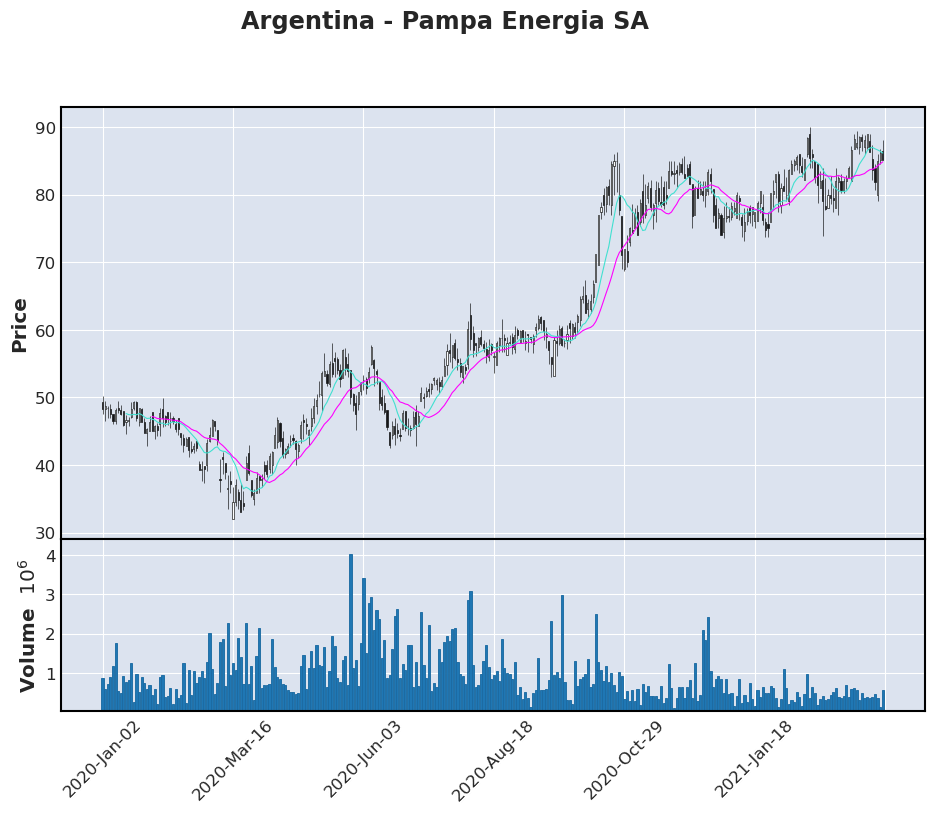

In [45]:
import mplfinance as mpf
import pandas as pd

if not isinstance(Argentina.index, pd.core.indexes.datetimes.DatetimeIndex):
    Argentina.set_index("Date", inplace=True)

mpf.plot(Argentina, type='candle', volume=True, mav=(10, 20), figscale=1.5, title='Argentina - Pampa Energia SA')

In [46]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Filter data for 2020 Q1, Q2, Q3, Q4
start_date = '2020-01-01'
end_date = '2020-12-31'
filtered_data = Argentina.loc[(Argentina.index >= start_date) & (Argentina.index <= end_date)].copy()

# Compute moving averages
window_sizes = [7, 30, 90]
for window_size in window_sizes:
    col_name = f'{window_size}-day Moving Average'
    filtered_data.loc[:, col_name] = filtered_data['Close'].rolling(window=window_size).mean()

# Fill NaN values in 30-day and 90-day moving averages with values from 7-day moving average
filtered_data['7-day Moving Average'].fillna(filtered_data['Close'], inplace=True)
filtered_data['30-day Moving Average'].fillna(filtered_data['7-day Moving Average'], inplace=True)
filtered_data['90-day Moving Average'].fillna(filtered_data['7-day Moving Average'], inplace=True)

# Drop rows with NaN values
filtered_data.dropna(inplace=True)

# Define the features and target
features = filtered_data[['7-day Moving Average', '30-day Moving Average', '90-day Moving Average']]
target = filtered_data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create and train the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

Mean Squared Error: 8.250110185888225
R-squared score: 0.9517868041657302


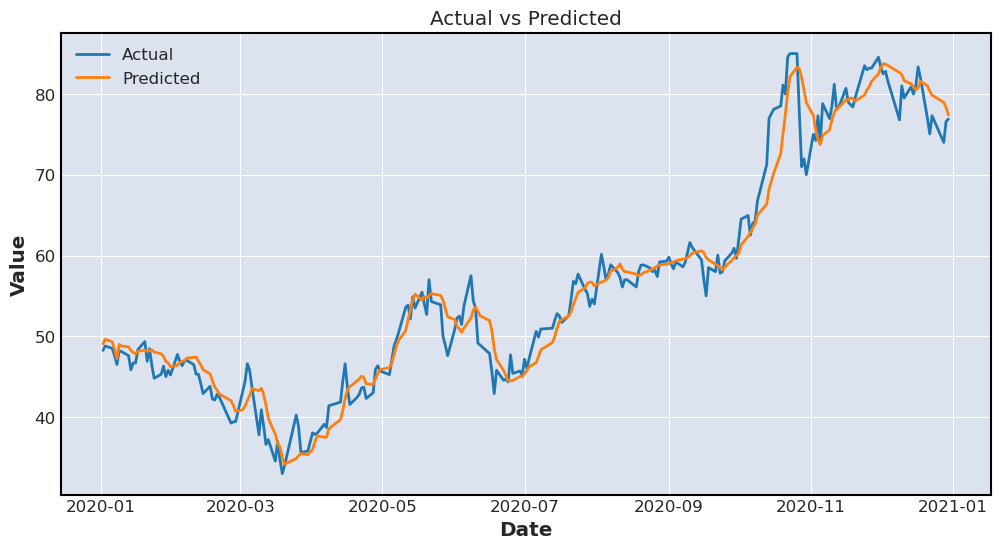

Mean Squared Error: 8.250110185888225
R-squared score: 0.9517868041657302


In [47]:
import matplotlib.pyplot as plt

# Increase the figure size
plt.figure(figsize=(12, 6))

# Plotting actual values
plt.plot(filtered_data.index, target, label='Actual')

# Plotting predicted values
plt.plot(filtered_data.index, regressor.predict(features), label='Predicted')


# Set labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Predicted')

# Add legend
plt.legend()

# Display the plot
plt.show()
print(f"Mean Squared Error: {mse}")
print("R-squared score:", r2)


In [48]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Filter data for Q1 2021
start_date21 = '2021-01-01'
end_date21 = '2021-03-31'
q1_data = Argentina.loc[(Argentina.index >= start_date21) & (Argentina.index <= end_date21)].copy()

# Compute moving averages for Q1 2021
window_sizes21 = [7, 30, 90]
for window_size21 in window_sizes21:
    col_name = f'{window_size21}-day Moving Average'
    q1_data[col_name] = q1_data['Close'].rolling(window=window_size21).mean()

# Fill NaN values in 30-day and 90-day moving averages with values from 7-day moving average
q1_data['30-day Moving Average'].fillna(q1_data['7-day Moving Average'], inplace=True)
q1_data['90-day Moving Average'].fillna(q1_data['7-day Moving Average'], inplace=True)

# Drop rows with NaN values
q1_data.dropna(inplace=True)

# Check if there are samples for Q1 2021 after dropping NaN values
if q1_data.shape[0] < 1:
    print("No data available for Q1 2021.")
else:
    # Define the features and target for Q1 2021
    q1_features = q1_data[['7-day Moving Average', '30-day Moving Average', '90-day Moving Average']]
    q1_target = q1_data['Close']

    # Make predictions for Q1 2021
    q1_predictions = regressor.predict(q1_features)  # Assuming 'regressor' is your trained model

    # Evaluate the model using Mean Squared Error (MSE) for Q1 2021
    q1_mse = mean_squared_error(q1_target, q1_predictions)
    print(f"Mean Squared Error (Q1 2021): {q1_mse}")

    # Calculate R-squared score
    r2 = r2_score(y_test, y_pred)
    print("R-squared score:", r2)

Mean Squared Error (Q1 2021): 11.356439715346646
R-squared score: 0.9517868041657302


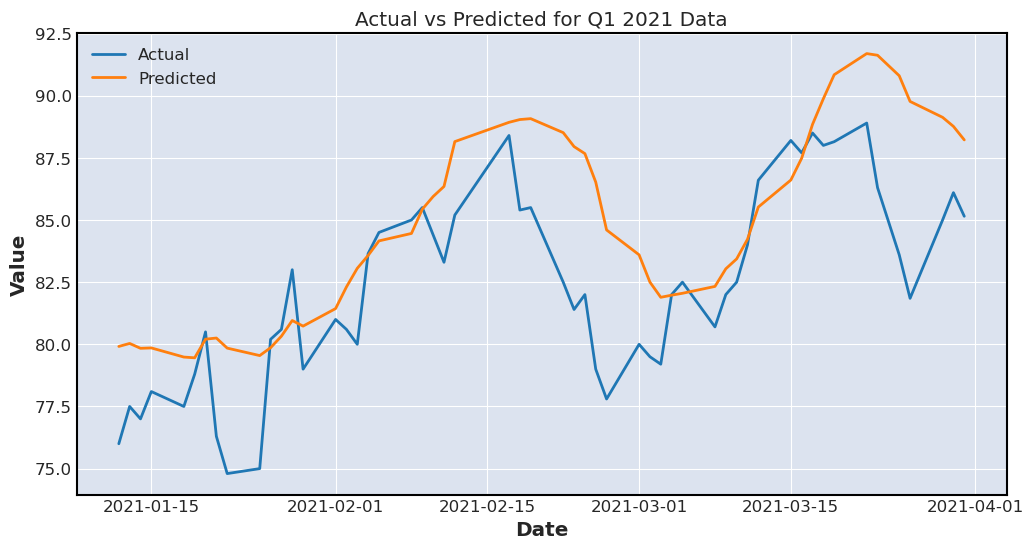

Mean Squared Error (Q1 2021): 11.356439715346646
R-squared score: 0.9517868041657302


In [49]:
import matplotlib.pyplot as plt

# Increase the figure size
plt.figure(figsize=(12, 6))

# Plotting actual values
plt.plot(q1_data.index, q1_target, label='Actual')

# Plotting predicted values
plt.plot(q1_data.index, q1_predictions, label='Predicted')


# Set labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Predicted for Q1 2021 Data')

# Add legend
plt.legend()

# Display the plot
plt.show()

print(f"Mean Squared Error (Q1 2021): {q1_mse}")
print("R-squared score:", r2)

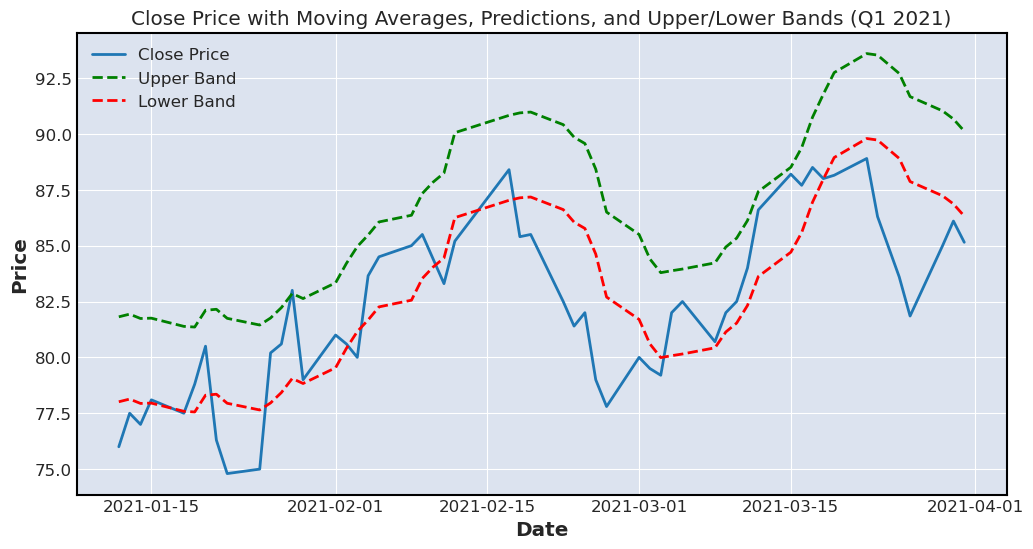

In [50]:
import numpy as np
    
# Calculate upper and lower bands based on the predictions
rstd = q1_predictions.std()  # Calculating the residual standard deviation
upper_band = q1_predictions + (.5 * rstd)
lower_band = q1_predictions - (.5 * rstd)

# Plot close prices with upper and lower bands
plt.figure(figsize=(12, 6))
plt.plot(q1_data.index, q1_data['Close'], label='Close Price')
plt.plot(q1_data.index, upper_band, label='Upper Band', linestyle='--', color='g')
plt.plot(q1_data.index, lower_band, label='Lower Band', linestyle='--', color='r')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close Price with Moving Averages, Predictions, and Upper/Lower Bands (Q1 2021)')
plt.legend()
plt.show()

In [51]:
# Calculate upper and lower bands based on the predictions
rstd = q1_predictions.std()  # Calculating the residual standard deviation
upper_band =pd.DataFrame(q1_predictions + (.5 * rstd))
lower_band = pd.DataFrame(q1_predictions - (.5 * rstd))

# Create a new column to store the classification labels
q1_data['Classification'] = 'Hold'

# Iterate over the data and classify based on intersections
for i in range(1, q1_data.shape[0]):
    if q1_data['Close'].iloc[i] > upper_band.iloc[i][0] and q1_data['Close'].iloc[i - 1] <= upper_band.iloc[i - 1][0]:
        q1_data['Classification'].iloc[i] = 'Sell'
    elif q1_data['Close'].iloc[i] < lower_band.iloc[i][0] and q1_data['Close'].iloc[i - 1] >= lower_band.iloc[i - 1][0]:
        q1_data['Classification'].iloc[i] = 'Buy'

# Print the data with classification labels
print(q1_data[['Close', '30-day Moving Average', '90-day Moving Average', 'Classification']])

            Close  30-day Moving Average  90-day Moving Average Classification
Date                                                                          
2021-01-12  76.00              77.635714              77.635714           Hold
2021-01-13  77.50              77.750000              77.750000           Hold
2021-01-14  77.00              77.564286              77.564286           Hold
2021-01-15  78.10              77.578571              77.578571           Hold
2021-01-18  77.50              77.228571              77.228571            Buy
2021-01-19  78.80              77.200000              77.200000           Hold
2021-01-20  80.50              77.914286              77.914286           Hold
2021-01-21  76.30              77.957143              77.957143            Buy
2021-01-22  74.80              77.571429              77.571429           Hold
2021-01-25  75.00              77.285714              77.285714           Hold
2021-01-26  80.20              77.585714            

/tmp/ipykernel_20/757242668.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_20/757242668.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [52]:
import pandas as pd
import plotly.graph_objects as go
from plotly.offline import plot


# Add this line to display plots inline
%matplotlib inline

# Create traces for the buy/sell signals
buy_signals = go.Scatter(
    x=q1_data[q1_data['Classification'] == 'Buy'].index,
    y=q1_data[q1_data['Classification'] == 'Buy']['Close'],
    mode='markers',
    marker=dict(symbol='triangle-up', size=10, color='green'),
    name='Buy Signals'
)
sell_signals = go.Scatter(
    x=q1_data[q1_data['Classification'] == 'Sell'].index,
    y=q1_data[q1_data['Classification'] == 'Sell']['Close'],
    mode='markers',
    marker=dict(symbol='triangle-down', size=10, color='red'),
    name='Sell Signals'
)

# Trace for the actual price
actual_price = go.Scatter(
    x=q1_data.index,
    y=q1_data['Close'],
    mode='lines',
    name='Actual Price'
)

# Create the layout
layout = go.Layout(
    title='Stock Price with Buy/Sell Signals',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Price')
)

# Create the data variable and include all the traces
data = [actual_price, buy_signals, sell_signals]

# Create the figure and plot
fig = go.Figure(data=data, layout=layout)

# Change this line to specify the rendering method as an iframe
fig.show(renderer='iframe')

# Export the plot to an HTML file
plot(fig, filename='ArgentinaStockPlot.html')

'ArgentinaStockPlot.html'

**Colombia - Cementos Argos SA (C**

In [53]:
# Load the Excel file
file_path = '/kaggle/input/stockprice/2020Q1Q2Q3Q4-2021Q1.xlsx'
Colombia = pd.read_excel(file_path, sheet_name='Colombia - Cementos Argos SA (C')  

# Convert date column to datetime format
Colombia['Date'] = pd.to_datetime(Colombia['Date'], infer_datetime_format=True, errors='coerce')


# Sort the data chronologically based on date
Colombia = Colombia.sort_values('Date')


# Print the updated DataFrame
print(Colombia.head())
print(Colombia.tail())
print(Colombia.info())


          Date Price  Open  High   Low     Vol.  Change %
302 2020-01-02  7120  7300  7300  7120  138.96K   -0.0247
301 2020-01-03  7000  7040  7100  6960  470.77K   -0.0169
300 2020-01-07  6950  6950  6950  6850  168.71K   -0.0071
299 2020-01-08  6880  6940  6950  6880   84.93K   -0.0101
298 2020-01-09  6810  6880  6890  6800  262.89K   -0.0102
          Date            Price                 Open              High  \
3   2021-03-26             5020                 5085              5085   
2   2021-03-29             5045                 5020              5045   
1   2021-03-30             5100                 5010              5100   
0   2021-03-31             5150                 5100              5170   
303        NaT  Lowest: 2,415.0  Difference: 4,885.0  Average: 4,836.5   

                 Low     Vol.  Change %  
3               4980  203.46K   -0.0020  
2               5015  117.54K    0.0050  
1               5010  583.70K    0.0109  
0               5100  212.44K    0.0098

In [54]:

# Define a function to convert the string representation to a float value
def convert_volume(volume):
    if isinstance(volume, float):
        return volume
    elif 'K' in volume:
        return float(volume.replace('K', '')) * 1000
    elif 'M' in volume:
        return float(volume.replace('M', '')) * 1000000
    else:
        return float(volume)

# Apply the conversion function to the "Volume" column
Colombia['Vol.'] = Colombia['Vol.'].apply(convert_volume)

# Convert the "Volume" column to float type
Colombia['Vol.'] = Colombia['Vol.'].astype(float)

Colombia.rename(columns={'Vol.': 'Volume'}, inplace=True)

#wee need to drop the last column because it has diffrent data
print(Colombia.tail(5),'\n')

# Drop row 311
Colombia = Colombia.drop(index=303)


# Convert Price, Open, High, Low columns to float 
for col in ['Price', 'Open', 'High', 'Low']:
    Colombia[col] = Colombia[col].astype(float)
   
Colombia.rename(columns={'Price': 'Close'}, inplace=True)

# Print the updated DataFrame
print(Colombia.head(),'\n')
print(Colombia.info(),'\n')

          Date            Price                 Open              High  \
3   2021-03-26             5020                 5085              5085   
2   2021-03-29             5045                 5020              5045   
1   2021-03-30             5100                 5010              5100   
0   2021-03-31             5150                 5100              5170   
303        NaT  Lowest: 2,415.0  Difference: 4,885.0  Average: 4,836.5   

                 Low    Volume  Change %  
3               4980  203460.0   -0.0020  
2               5015  117540.0    0.0050  
1               5010  583700.0    0.0109  
0               5100  212440.0    0.0098  
303  Change %: -29.5       NaN       NaN   

          Date   Close    Open    High     Low    Volume  Change %
302 2020-01-02  7120.0  7300.0  7300.0  7120.0  138960.0   -0.0247
301 2020-01-03  7000.0  7040.0  7100.0  6960.0  470770.0   -0.0169
300 2020-01-07  6950.0  6950.0  6950.0  6850.0  168710.0   -0.0071
299 2020-01-08  6880.0  694

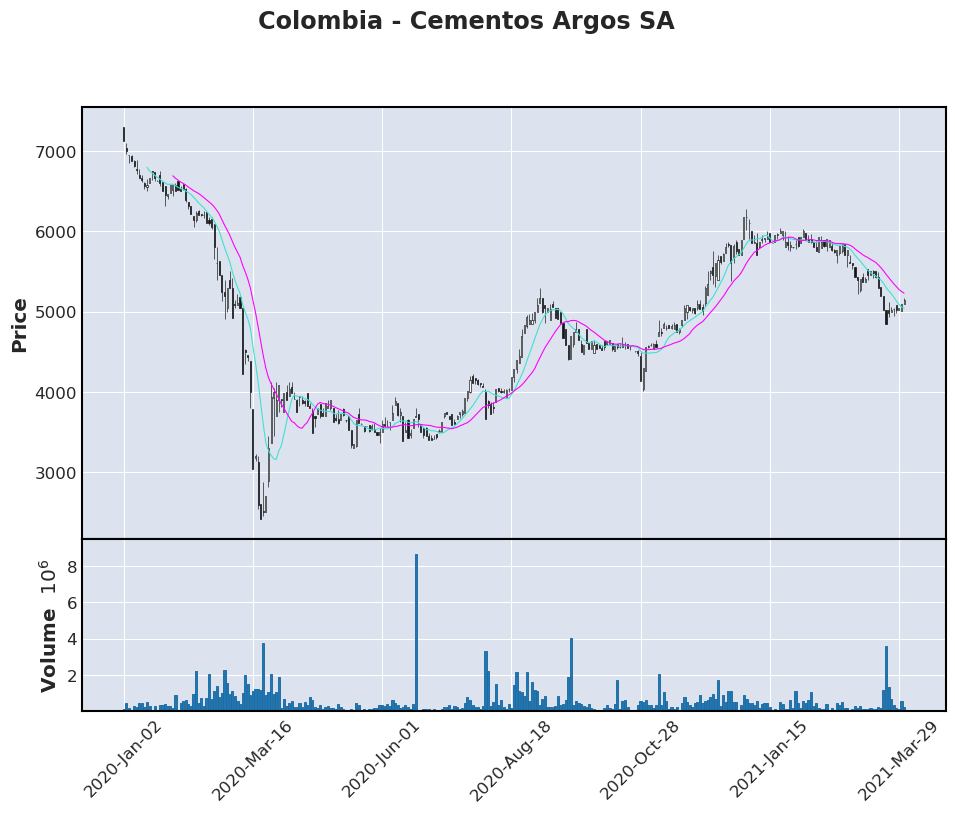

In [55]:
import mplfinance as mpf
import pandas as pd

if not isinstance(Colombia.index, pd.core.indexes.datetimes.DatetimeIndex):
    Colombia.set_index("Date", inplace=True)

mpf.plot(Colombia, type='candle', volume=True, mav=(10, 20), figscale=1.5, title='Colombia - Cementos Argos SA')

In [56]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Filter data for 2020 Q1, Q2, Q3, Q4
start_date = '2020-01-01'
end_date = '2020-12-31'
filtered_data = Colombia.loc[(Colombia.index >= start_date) & (Colombia.index <= end_date)].copy()

# Compute moving averages
window_sizes = [7, 30, 90]
for window_size in window_sizes:
    col_name = f'{window_size}-day Moving Average'
    filtered_data.loc[:, col_name] = filtered_data['Close'].rolling(window=window_size).mean()

# Fill NaN values in 30-day and 90-day moving averages with values from 7-day moving average
filtered_data['7-day Moving Average'].fillna(filtered_data['Close'], inplace=True)
filtered_data['30-day Moving Average'].fillna(filtered_data['7-day Moving Average'], inplace=True)
filtered_data['90-day Moving Average'].fillna(filtered_data['7-day Moving Average'], inplace=True)

# Drop rows with NaN values
filtered_data.dropna(inplace=True)

# Define the features and target
features = filtered_data[['7-day Moving Average', '30-day Moving Average', '90-day Moving Average']]
target = filtered_data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create and train the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

Mean Squared Error: 33504.39747854349
R-squared score: 0.9714177389782742


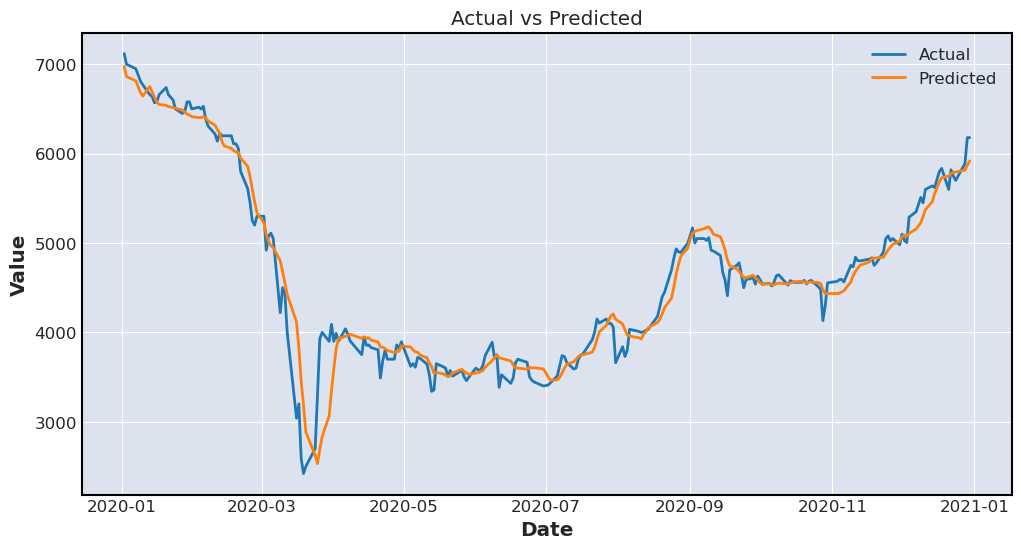

Mean Squared Error: 33504.39747854349
R-squared score: 0.9714177389782742


In [57]:
import matplotlib.pyplot as plt

# Increase the figure size
plt.figure(figsize=(12, 6))

# Plotting actual values
plt.plot(filtered_data.index, target, label='Actual')

# Plotting predicted values
plt.plot(filtered_data.index, regressor.predict(features), label='Predicted')


# Set labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Predicted')

# Add legend
plt.legend()

# Display the plot
plt.show()
print(f"Mean Squared Error: {mse}")
print("R-squared score:", r2)


In [58]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Filter data for Q1 2021
start_date21 = '2021-01-01'
end_date21 = '2021-03-31'
q1_data = Colombia.loc[(Colombia.index >= start_date21) & (Colombia.index <= end_date21)].copy()

# Compute moving averages for Q1 2021
window_sizes21 = [7, 30, 90]
for window_size21 in window_sizes21:
    col_name = f'{window_size21}-day Moving Average'
    q1_data[col_name] = q1_data['Close'].rolling(window=window_size21).mean()

# Fill NaN values in 30-day and 90-day moving averages with values from 7-day moving average
q1_data['30-day Moving Average'].fillna(q1_data['7-day Moving Average'], inplace=True)
q1_data['90-day Moving Average'].fillna(q1_data['7-day Moving Average'], inplace=True)

# Drop rows with NaN values
q1_data.dropna(inplace=True)

# Check if there are samples for Q1 2021 after dropping NaN values
if q1_data.shape[0] < 1:
    print("No data available for Q1 2021.")
else:
    # Define the features and target for Q1 2021
    q1_features = q1_data[['7-day Moving Average', '30-day Moving Average', '90-day Moving Average']]
    q1_target = q1_data['Close']

    # Make predictions for Q1 2021
    q1_predictions = regressor.predict(q1_features)  # Assuming 'regressor' is your trained model

    # Evaluate the model using Mean Squared Error (MSE) for Q1 2021
    q1_mse = mean_squared_error(q1_target, q1_predictions)
    print(f"Mean Squared Error (Q1 2021): {q1_mse}")
    
    # Calculate R-squared score
    r2 = r2_score(y_test, y_pred)
    print("R-squared score:", r2)

Mean Squared Error (Q1 2021): 13031.517255593993
R-squared score: 0.9714177389782742


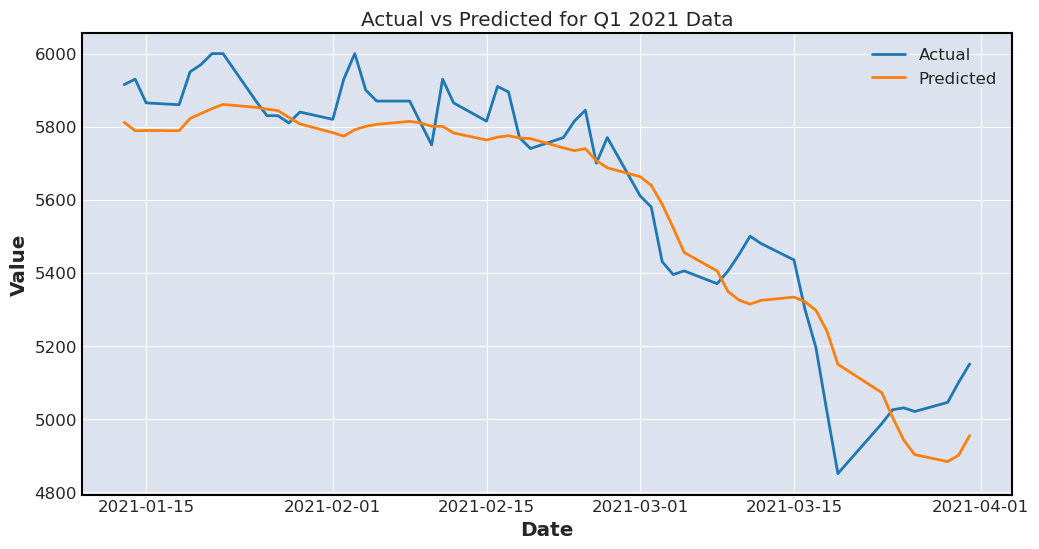

Mean Squared Error (Q1 2021): 13031.517255593993
R-squared score: 0.9714177389782742


In [59]:
import matplotlib.pyplot as plt

# Increase the figure size
plt.figure(figsize=(12, 6))

# Plotting actual values
plt.plot(q1_data.index, q1_target, label='Actual')

# Plotting predicted values
plt.plot(q1_data.index, q1_predictions, label='Predicted')


# Set labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Predicted for Q1 2021 Data')

# Add legend
plt.legend()

# Display the plot
plt.show()

print(f"Mean Squared Error (Q1 2021): {q1_mse}")
print("R-squared score:", r2)

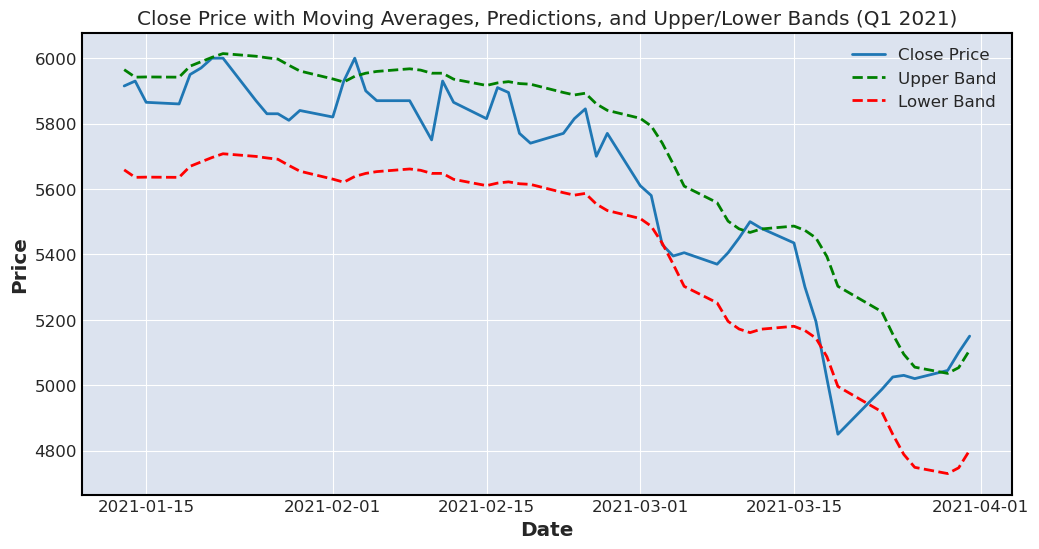

In [60]:
import numpy as np

# Calculate upper and lower bands based on the predictions
rstd = q1_predictions.std()  # Calculating the residual standard deviation
upper_band = q1_predictions + (.5 * rstd)
lower_band = q1_predictions - (.5 * rstd)

# Plot close prices with upper and lower bands
plt.figure(figsize=(12, 6))
plt.plot(q1_data.index, q1_data['Close'], label='Close Price')
plt.plot(q1_data.index, upper_band, label='Upper Band', linestyle='--', color='g')
plt.plot(q1_data.index, lower_band, label='Lower Band', linestyle='--', color='r')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close Price with Moving Averages, Predictions, and Upper/Lower Bands (Q1 2021)')
plt.legend()
plt.show()

In [61]:
# Calculate upper and lower bands based on the predictions
rstd = q1_predictions.std()  # Calculating the residual standard deviation
upper_band =pd.DataFrame(q1_predictions + (.5 * rstd))
lower_band = pd.DataFrame(q1_predictions - (.5 * rstd))

# Create a new column to store the classification labels
q1_data['Classification'] = 'Hold'

# Iterate over the data and classify based on intersections
for i in range(1, q1_data.shape[0]):
    if q1_data['Close'].iloc[i] > upper_band.iloc[i][0] and q1_data['Close'].iloc[i - 1] <= upper_band.iloc[i - 1][0]:
        q1_data['Classification'].iloc[i] = 'Sell'
    elif q1_data['Close'].iloc[i] < lower_band.iloc[i][0] and q1_data['Close'].iloc[i - 1] >= lower_band.iloc[i - 1][0]:
        q1_data['Classification'].iloc[i] = 'Buy'

# Print the data with classification labels
print(q1_data[['Close', '30-day Moving Average', '90-day Moving Average', 'Classification']])


             Close  30-day Moving Average  90-day Moving Average  \
Date                                                               
2021-01-13  5915.0            5887.142857            5887.142857   
2021-01-14  5930.0            5862.857143            5862.857143   
2021-01-15  5865.0            5863.571429            5863.571429   
2021-01-18  5860.0            5862.857143            5862.857143   
2021-01-19  5950.0            5898.571429            5898.571429   
2021-01-20  5970.0            5912.857143            5912.857143   
2021-01-21  6000.0            5927.142857            5927.142857   
2021-01-22  6000.0            5939.285714            5939.285714   
2021-01-25  5870.0            5930.714286            5930.714286   
2021-01-26  5830.0            5925.714286            5925.714286   
2021-01-27  5830.0            5921.428571            5921.428571   
2021-01-28  5810.0            5901.428571            5901.428571   
2021-01-29  5840.0            5882.857143       

/tmp/ipykernel_20/1267911981.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_20/1267911981.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [62]:
import pandas as pd
import plotly.graph_objects as go
from plotly.offline import plot


# Add this line to display plots inline
%matplotlib inline

# Create traces for the buy/sell signals
buy_signals = go.Scatter(
    x=q1_data[q1_data['Classification'] == 'Buy'].index,
    y=q1_data[q1_data['Classification'] == 'Buy']['Close'],
    mode='markers',
    marker=dict(symbol='triangle-up', size=10, color='green'),
    name='Buy Signals'
)
sell_signals = go.Scatter(
    x=q1_data[q1_data['Classification'] == 'Sell'].index,
    y=q1_data[q1_data['Classification'] == 'Sell']['Close'],
    mode='markers',
    marker=dict(symbol='triangle-down', size=10, color='red'),
    name='Sell Signals'
)

# Trace for the actual price
actual_price = go.Scatter(
    x=q1_data.index,
    y=q1_data['Close'],
    mode='lines',
    name='Actual Price'
)

# Create the layout
layout = go.Layout(
    title='Stock Price with Buy/Sell Signals',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Price')
)

# Create the data variable and include all the traces
data = [actual_price, buy_signals, sell_signals]

# Create the figure and plot
fig = go.Figure(data=data, layout=layout)

# Change this line to specify the rendering method as an iframe
fig.show(renderer='iframe')

# Export the plot to an HTML file
plot(fig, filename='ColombiaStockPlot.html')

'ColombiaStockPlot.html'

**South Africa - Impala Platinum**

In [63]:
# Load the Excel file
file_path = '/kaggle/input/stockprice/2020Q1Q2Q3Q4-2021Q1.xlsx'
SouthAfrica = pd.read_excel(file_path, sheet_name='South Africa - Impala Platinum ')  

# Convert date column to datetime format
SouthAfrica['Date'] = pd.to_datetime(SouthAfrica['Date'], infer_datetime_format=True, errors='coerce')


# Sort the data chronologically based on date
SouthAfrica = SouthAfrica.sort_values('Date')


# Print the updated DataFrame
print(SouthAfrica)
print(SouthAfrica.info())

          Date          Price                Open             High  \
313 2020-01-02          14330               14525            14764   
312 2020-01-03          14843               14700            14884   
311 2020-01-06          14620               14985            15045   
310 2020-01-07          14500               14688            14688   
309 2020-01-08          15290               14775            15465   
..         ...            ...                 ...              ...   
3   2021-03-26          27533               27083            28006   
2   2021-03-29          26980               27800            28174   
1   2021-03-30          26898               26766            27443   
0   2021-03-31          27373               26980            27526   
314        NaT  Lowest: 4,476  Difference: 25,301  Average: 16,018   

              Low   Vol.  Change %  
313         14325  2.01M   -0.0015  
312         14360  3.19M    0.0358  
311         14574  2.61M   -0.0150  
310        

In [64]:
import pandas as pd

# Assuming you have a DataFrame named "df" with a column named "Volume"

# Define a function to convert the string representation to a float value
def convert_volume(volume):
    if isinstance(volume, float):
        return volume
    elif 'K' in volume:
        return float(volume.replace('K', '')) * 1000
    elif 'M' in volume:
        return float(volume.replace('M', '')) * 1000000
    else:
        return float(volume)

# Apply the conversion function to the "Volume" column
SouthAfrica['Vol.'] = SouthAfrica['Vol.'].apply(convert_volume)

# Convert the "Volume" column to float type
SouthAfrica['Vol.'] = SouthAfrica['Vol.'].astype(float)

SouthAfrica.rename(columns={'Vol.': 'Volume'}, inplace=True)


# Drop last row 
SouthAfrica = SouthAfrica.drop(index=314)


# Convert Price, Open, High, Low columns to float 
for col in ['Price', 'Open', 'High', 'Low']:
    SouthAfrica[col] = SouthAfrica[col].astype(float)
   
SouthAfrica.rename(columns={'Price': 'Close'}, inplace=True)

# Print the updated DataFrame
print(SouthAfrica.head(),'\n')
print(SouthAfrica.info(),'\n')

          Date    Close     Open     High      Low     Volume  Change %
313 2020-01-02  14330.0  14525.0  14764.0  14325.0  2010000.0   -0.0015
312 2020-01-03  14843.0  14700.0  14884.0  14360.0  3190000.0    0.0358
311 2020-01-06  14620.0  14985.0  15045.0  14574.0  2610000.0   -0.0150
310 2020-01-07  14500.0  14688.0  14688.0  13940.0  3940000.0   -0.0082
309 2020-01-08  15290.0  14775.0  15465.0  14468.0  6240000.0    0.0545 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314 entries, 313 to 0
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      314 non-null    datetime64[ns]
 1   Close     314 non-null    float64       
 2   Open      314 non-null    float64       
 3   High      314 non-null    float64       
 4   Low       314 non-null    float64       
 5   Volume    314 non-null    float64       
 6   Change %  314 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usa

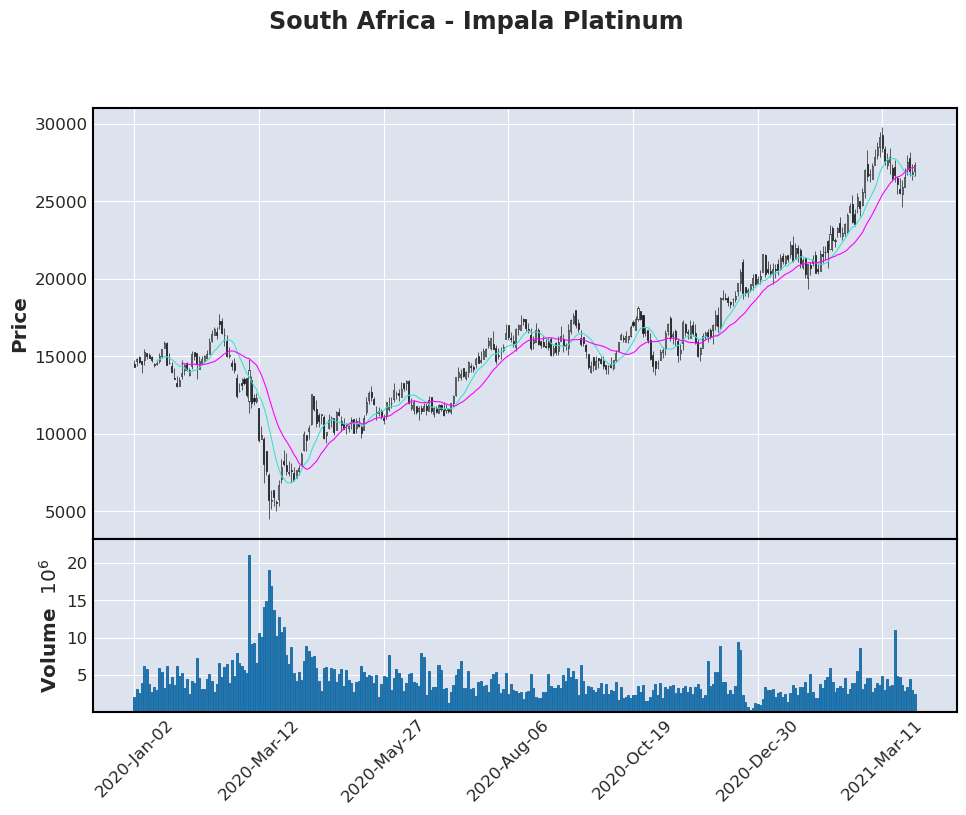

In [65]:
import mplfinance as mpf
import pandas as pd

if not isinstance(SouthAfrica.index, pd.core.indexes.datetimes.DatetimeIndex):
    SouthAfrica.set_index("Date", inplace=True)

mpf.plot(SouthAfrica, type='candle', volume=True, mav=(10, 20), figscale=1.5, title='South Africa - Impala Platinum')

In [66]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# Filter data for 2020 Q1, Q2, Q3, Q4
start_date = '2020-01-01'
end_date = '2020-12-31'
filtered_data = SouthAfrica.loc[(SouthAfrica.index >= start_date) & (SouthAfrica.index <= end_date)].copy()

# Compute moving averages
window_sizes = [7, 30, 90]
for window_size in window_sizes:
    col_name = f'{window_size}-day Moving Average'
    filtered_data.loc[:, col_name] = filtered_data['Close'].rolling(window=window_size).mean()

# Fill NaN values in 30-day and 90-day moving averages with values from 7-day moving average
filtered_data['7-day Moving Average'].fillna(filtered_data['Close'], inplace=True)
filtered_data['30-day Moving Average'].fillna(filtered_data['7-day Moving Average'], inplace=True)
filtered_data['90-day Moving Average'].fillna(filtered_data['7-day Moving Average'], inplace=True)

# Drop rows with NaN values
filtered_data.dropna(inplace=True)

# Define the features and target
features = filtered_data[['7-day Moving Average', '30-day Moving Average', '90-day Moving Average']]
target = filtered_data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create and train the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

Mean Squared Error: 774725.2162429105
R-squared score: 0.8807673000004584


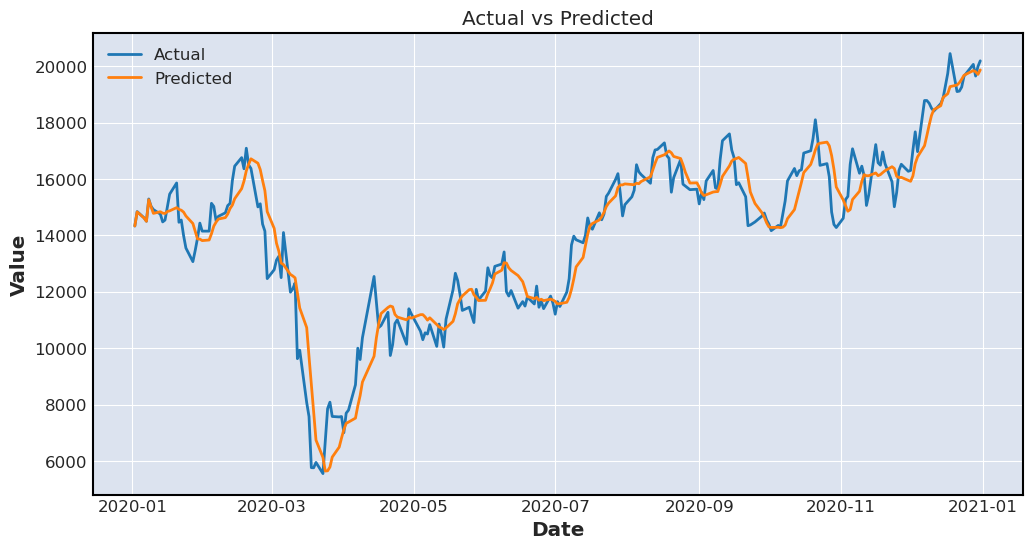

Mean Squared Error: 774725.2162429105
R-squared score: 0.8807673000004584


In [67]:
import matplotlib.pyplot as plt

# Increase the figure size
plt.figure(figsize=(12, 6))

# Plotting actual values
plt.plot(filtered_data.index, target, label='Actual')

# Plotting predicted values
plt.plot(filtered_data.index, regressor.predict(features), label='Predicted')


# Set labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Predicted')

# Add legend
plt.legend()

# Display the plot
plt.show()
print(f"Mean Squared Error: {mse}")
print("R-squared score:", r2)

In [68]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Filter data for Q1 2021
start_date21 = '2021-01-01'
end_date21 = '2021-03-31'
q1_data = SouthAfrica.loc[(SouthAfrica.index >= start_date21) & (SouthAfrica.index <= end_date21)].copy()

# Compute moving averages for Q1 2021
window_sizes21 = [7, 30, 90]
for window_size21 in window_sizes21:
    col_name = f'{window_size21}-day Moving Average'
    q1_data[col_name] = q1_data['Close'].rolling(window=window_size21).mean()

# Fill NaN values in 30-day and 90-day moving averages with values from 7-day moving average
q1_data['30-day Moving Average'].fillna(q1_data['7-day Moving Average'], inplace=True)
q1_data['90-day Moving Average'].fillna(q1_data['7-day Moving Average'], inplace=True)

# Drop rows with NaN values
q1_data.dropna(inplace=True)

# Check if there are samples for Q1 2021 after dropping NaN values
if q1_data.shape[0] < 1:
    print("No data available for Q1 2021.")
else:
    # Define the features and target for Q1 2021
    q1_features = q1_data[['7-day Moving Average', '30-day Moving Average', '90-day Moving Average']]
    q1_target = q1_data['Close']

    # Make predictions for Q1 2021
    q1_predictions = regressor.predict(q1_features)  # Assuming 'regressor' is your trained model

    # Evaluate the model using Mean Squared Error (MSE) for Q1 2021
    q1_mse = mean_squared_error(q1_target, q1_predictions)
    print(f"Mean Squared Error (Q1 2021): {q1_mse}")

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

Mean Squared Error (Q1 2021): 744887.4302178081
R-squared score: 0.8807673000004584


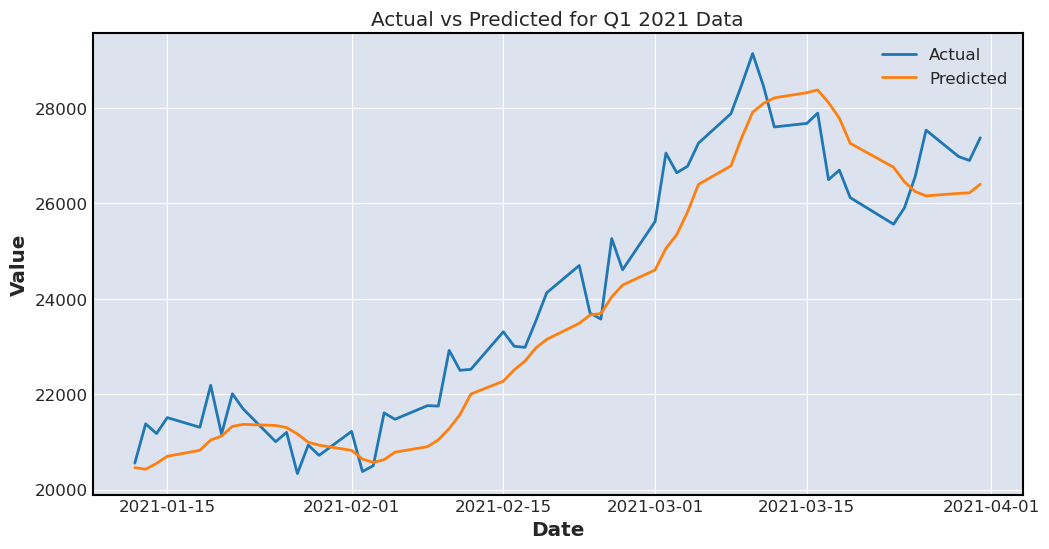

Mean Squared Error (Q1 2021): 744887.4302178081
R-squared score: 0.8807673000004584


In [69]:
import matplotlib.pyplot as plt

# Increase the figure size
plt.figure(figsize=(12, 6))

# Plotting actual values
plt.plot(q1_data.index, q1_target, label='Actual')

# Plotting predicted values
plt.plot(q1_data.index, q1_predictions, label='Predicted')


# Set labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Predicted for Q1 2021 Data')

# Add legend
plt.legend()

# Display the plot
plt.show()

print(f"Mean Squared Error (Q1 2021): {q1_mse}")
print("R-squared score:", r2)

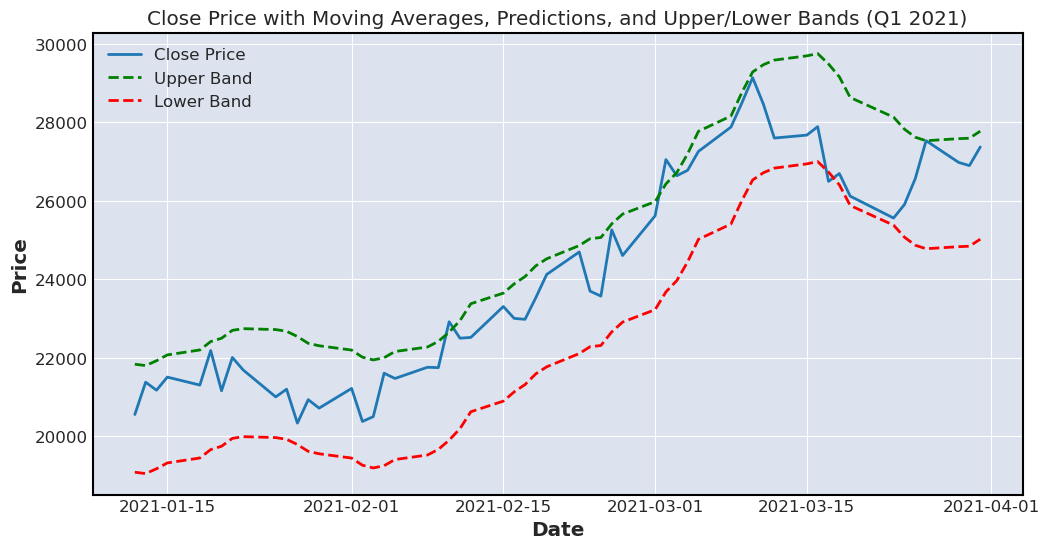

In [70]:
import numpy as np
    
# Calculate upper and lower bands based on the predictions
rstd = q1_predictions.std()  # Calculating the residual standard deviation
upper_band = q1_predictions + (.5 * rstd)
lower_band = q1_predictions - (.5 * rstd)

# Plot close prices with upper and lower bands
plt.figure(figsize=(12, 6))
plt.plot(q1_data.index, q1_data['Close'], label='Close Price')
plt.plot(q1_data.index, upper_band, label='Upper Band', linestyle='--', color='g')
plt.plot(q1_data.index, lower_band, label='Lower Band', linestyle='--', color='r')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close Price with Moving Averages, Predictions, and Upper/Lower Bands (Q1 2021)')
plt.legend()
plt.show()

In [71]:
# Calculate upper and lower bands based on the predictions
rstd = q1_predictions.std()  # Calculating the residual standard deviation
upper_band =pd.DataFrame(q1_predictions + (.5 * rstd))
lower_band = pd.DataFrame(q1_predictions - (.5 * rstd))

# Create a new column to store the classification labels
q1_data['Classification'] = 'Hold'

# Iterate over the data and classify based on intersections
for i in range(1, q1_data.shape[0]):
    if q1_data['Close'].iloc[i] > upper_band.iloc[i][0] and q1_data['Close'].iloc[i - 1] <= upper_band.iloc[i - 1][0]:
        q1_data['Classification'].iloc[i] = 'Sell'
    elif q1_data['Close'].iloc[i] < lower_band.iloc[i][0] and q1_data['Close'].iloc[i - 1] >= lower_band.iloc[i - 1][0]:
        q1_data['Classification'].iloc[i] = 'Buy'

# Print the data with classification labels
print(q1_data[['Close', '30-day Moving Average', '90-day Moving Average', 'Classification']])

              Close  30-day Moving Average  90-day Moving Average  \
Date                                                                
2021-01-12  20555.0           20643.142857           20643.142857   
2021-01-13  21379.0           20607.428571           20607.428571   
2021-01-14  21175.0           20734.142857           20734.142857   
2021-01-15  21509.0           20887.428571           20887.428571   
2021-01-18  21306.0           21016.857143           21016.857143   
2021-01-19  22186.0           21237.142857           21237.142857   
2021-01-20  21161.0           21324.428571           21324.428571   
2021-01-21  22009.0           21532.142857           21532.142857   
2021-01-22  21690.0           21576.571429           21576.571429   
2021-01-25  21005.0           21552.285714           21552.285714   
2021-01-26  21200.0           21508.142857           21508.142857   
2021-01-27  20336.0           21369.571429           21369.571429   
2021-01-28  20934.0           2119

/tmp/ipykernel_20/757242668.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_20/757242668.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [72]:
import pandas as pd
import plotly.graph_objects as go
from plotly.offline import plot


# Add this line to display plots inline
%matplotlib inline

# Create traces for the buy/sell signals
buy_signals = go.Scatter(
    x=q1_data[q1_data['Classification'] == 'Buy'].index,
    y=q1_data[q1_data['Classification'] == 'Buy']['Close'],
    mode='markers',
    marker=dict(symbol='triangle-up', size=10, color='green'),
    name='Buy Signals'
)
sell_signals = go.Scatter(
    x=q1_data[q1_data['Classification'] == 'Sell'].index,
    y=q1_data[q1_data['Classification'] == 'Sell']['Close'],
    mode='markers',
    marker=dict(symbol='triangle-down', size=10, color='red'),
    name='Sell Signals'
)

# Trace for the actual price
actual_price = go.Scatter(
    x=q1_data.index,
    y=q1_data['Close'],
    mode='lines',
    name='Actual Price'
)

# Create the layout
layout = go.Layout(
    title='Stock Price with Buy/Sell Signals',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Price')
)

# Create the data variable and include all the traces
data = [actual_price, buy_signals, sell_signals]

# Create the figure and plot
fig = go.Figure(data=data, layout=layout)

# Change this line to specify the rendering method as an iframe
fig.show(renderer='iframe')

# Export the plot to an HTML file
plot(fig, filename='SouthAfricaStockPlot.html')


'SouthAfricaStockPlot.html'

**South Korea - Dongkuk Steel Mil**

In [73]:
# Load the Excel file
file_path = '/kaggle/input/stockprice/2020Q1Q2Q3Q4-2021Q1.xlsx'
SouthKorea = pd.read_excel(file_path, sheet_name='South Korea - Dongkuk Steel Mil')  

# Convert date column to datetime format
SouthKorea['Date'] = pd.to_datetime(SouthKorea['Date'], infer_datetime_format=True, errors='coerce')


# Sort the data chronologically based on date
SouthKorea = SouthKorea.sort_values('Date')


# Print the updated DataFrame
print(SouthKorea)
print(SouthKorea.info())


          Date          Price                Open            High  \
340 2020-01-02           5850                5930            5980   
339 2020-01-03           5900                5870            5920   
338 2020-01-06           5730                5890            5890   
337 2020-01-07           5690                5740            5770   
336 2020-01-08           5430                5640            5640   
..         ...            ...                 ...             ...   
3   2021-03-28          12200               12200           12200   
2   2021-03-29          13550               12500           13800   
1   2021-03-30          13650               13850           14200   
0   2021-03-31          13650               13700           13750   
341        NaT  Lowest: 2,780  Difference: 11,420  Average: 6,492   

               Low     Vol.  Change %  
340           5820  239.90K   -0.0168  
339           5830  230.40K    0.0085  
338           5680  319.88K   -0.0288  
337        

In [74]:
import pandas as pd

# Define a function to convert the string representation to a float value
def convert_volume(volume):
    if isinstance(volume, float):
        return volume
    elif volume == '-':
        return 0.0  # Set the value to 0 for the '-' case
    elif 'K' in volume:
        return float(volume.replace('K', '')) * 1000
    elif 'M' in volume:
        return float(volume.replace('M', '')) * 1000000
    else:
        return float(volume)
    
# Replace missing values with a default value (e.g., 0.0)
SouthKorea['Vol.'] = SouthKorea['Vol.'].fillna(0.0)

# Apply the conversion function to the "Volume" column
SouthKorea['Vol.'] = SouthKorea['Vol.'].apply(convert_volume)

# Convert the "Volume" column to float type
SouthKorea['Vol.'] = SouthKorea['Vol.'].astype(float)

SouthKorea.rename(columns={'Vol.': 'Volume'}, inplace=True)


# Drop last row
SouthKorea = SouthKorea.drop(index=341)


# Convert Price, Open, High, Low columns to float 
for col in ['Price', 'Open', 'High', 'Low']:
    SouthKorea[col] = SouthKorea[col].astype(float)
   
SouthKorea.rename(columns={'Price': 'Close'}, inplace=True)

# Print the updated DataFrame
print(SouthKorea.head(),'\n')
print(SouthKorea.info(),'\n')

          Date   Close    Open    High     Low    Volume  Change %
340 2020-01-02  5850.0  5930.0  5980.0  5820.0  239900.0   -0.0168
339 2020-01-03  5900.0  5870.0  5920.0  5830.0  230400.0    0.0085
338 2020-01-06  5730.0  5890.0  5890.0  5680.0  319880.0   -0.0288
337 2020-01-07  5690.0  5740.0  5770.0  5650.0  303890.0   -0.0070
336 2020-01-08  5430.0  5640.0  5640.0  5390.0  524100.0   -0.0457 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 341 entries, 340 to 0
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      341 non-null    datetime64[ns]
 1   Close     341 non-null    float64       
 2   Open      341 non-null    float64       
 3   High      341 non-null    float64       
 4   Low       341 non-null    float64       
 5   Volume    341 non-null    float64       
 6   Change %  341 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 21.3 KB
None 



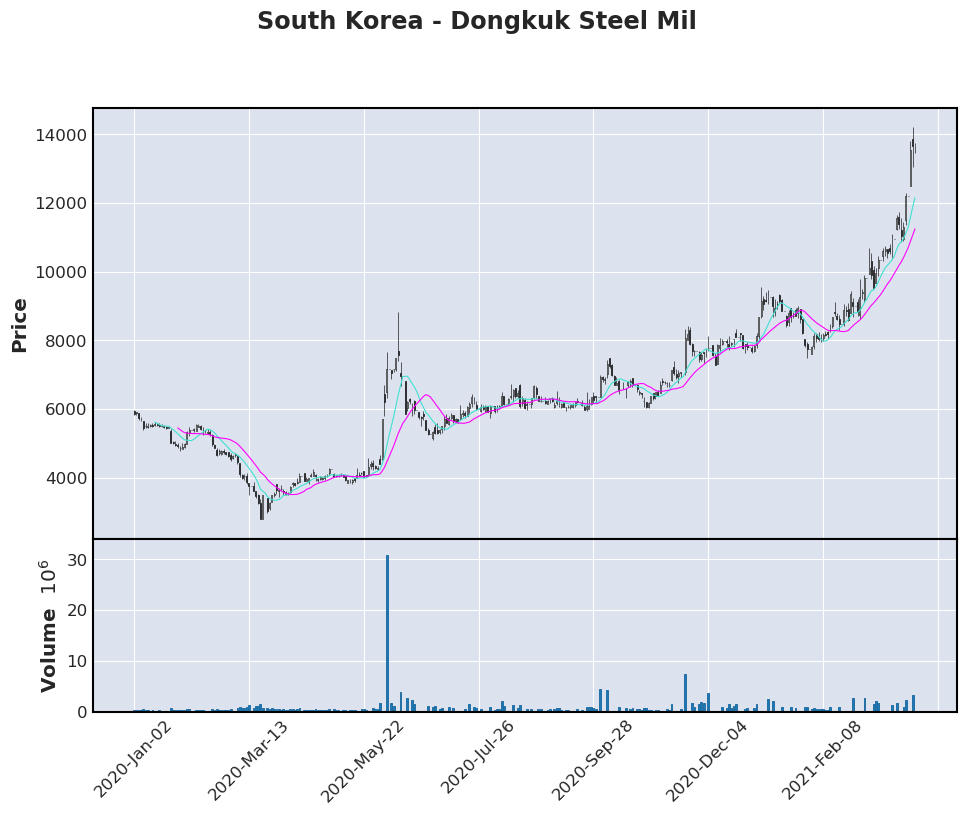

In [75]:
import mplfinance as mpf
import pandas as pd

if not isinstance(SouthKorea.index, pd.core.indexes.datetimes.DatetimeIndex):
    SouthKorea.set_index("Date", inplace=True)

mpf.plot(SouthKorea, type='candle', volume=True, mav=(10, 20), figscale=1.5, title='South Korea - Dongkuk Steel Mil')

In [76]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Filter data for 2020 Q1, Q2, Q3, Q4
start_date = '2020-01-01'
end_date = '2020-12-31'
filtered_data = SouthKorea .loc[(SouthKorea.index >= start_date) & (SouthKorea.index <= end_date)].copy()

# Compute moving averages
window_sizes = [7, 30, 90]
for window_size in window_sizes:
    col_name = f'{window_size}-day Moving Average'
    filtered_data.loc[:, col_name] = filtered_data['Close'].rolling(window=window_size).mean()

# Fill NaN values in 30-day and 90-day moving averages with values from 7-day moving average
filtered_data['7-day Moving Average'].fillna(filtered_data['Close'], inplace=True)
filtered_data['30-day Moving Average'].fillna(filtered_data['7-day Moving Average'], inplace=True)
filtered_data['90-day Moving Average'].fillna(filtered_data['7-day Moving Average'], inplace=True)

# Drop rows with NaN values
filtered_data.dropna(inplace=True)

# Define the features and target
features = filtered_data[['7-day Moving Average', '30-day Moving Average', '90-day Moving Average']]
target = filtered_data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create and train the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

Mean Squared Error: 156012.60410777663
R-squared score: 0.8879907287298312


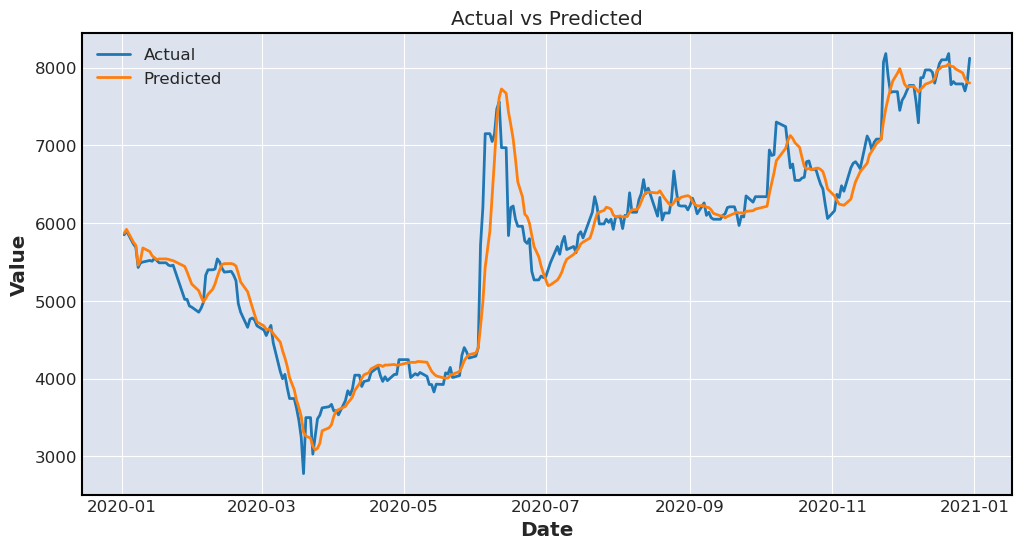

Mean Squared Error: 156012.60410777663
R-squared score: 0.8879907287298312


In [77]:
import matplotlib.pyplot as plt

# Increase the figure size
plt.figure(figsize=(12, 6))

# Plotting actual values
plt.plot(filtered_data.index, target, label='Actual')

# Plotting predicted values
plt.plot(filtered_data.index, regressor.predict(features), label='Predicted')


# Set labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Predicted')

# Add legend
plt.legend()

# Display the plot
plt.show()
print(f"Mean Squared Error: {mse}")
print("R-squared score:", r2)

In [78]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Filter data for Q1 2021
start_date21 = '2021-01-01'
end_date21 = '2021-03-31'
q1_data = SouthKorea.loc[(SouthKorea.index >= start_date21) & (SouthKorea.index <= end_date21)].copy()

# Compute moving averages for Q1 2021
window_sizes21 = [7, 30, 90]
for window_size21 in window_sizes21:
    col_name = f'{window_size21}-day Moving Average'
    q1_data[col_name] = q1_data['Close'].rolling(window=window_size21).mean()

# Fill NaN values in 30-day and 90-day moving averages with values from 7-day moving average
q1_data['30-day Moving Average'].fillna(q1_data['7-day Moving Average'], inplace=True)
q1_data['90-day Moving Average'].fillna(q1_data['7-day Moving Average'], inplace=True)

# Drop rows with NaN values
q1_data.dropna(inplace=True)

# Check if there are samples for Q1 2021 after dropping NaN values
if q1_data.shape[0] < 1:
    print("No data available for Q1 2021.")
else:
    # Define the features and target for Q1 2021
    q1_features = q1_data[['7-day Moving Average', '30-day Moving Average', '90-day Moving Average']]
    q1_target = q1_data['Close']

    # Make predictions for Q1 2021
    q1_predictions = regressor.predict(q1_features)  # Assuming 'regressor' is your trained model

    # Evaluate the model using Mean Squared Error (MSE) for Q1 2021
    q1_mse = mean_squared_error(q1_target, q1_predictions)
    print(f"Mean Squared Error (Q1 2021): {q1_mse}")

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

Mean Squared Error (Q1 2021): 141718.22751752494
R-squared score: 0.8879907287298312


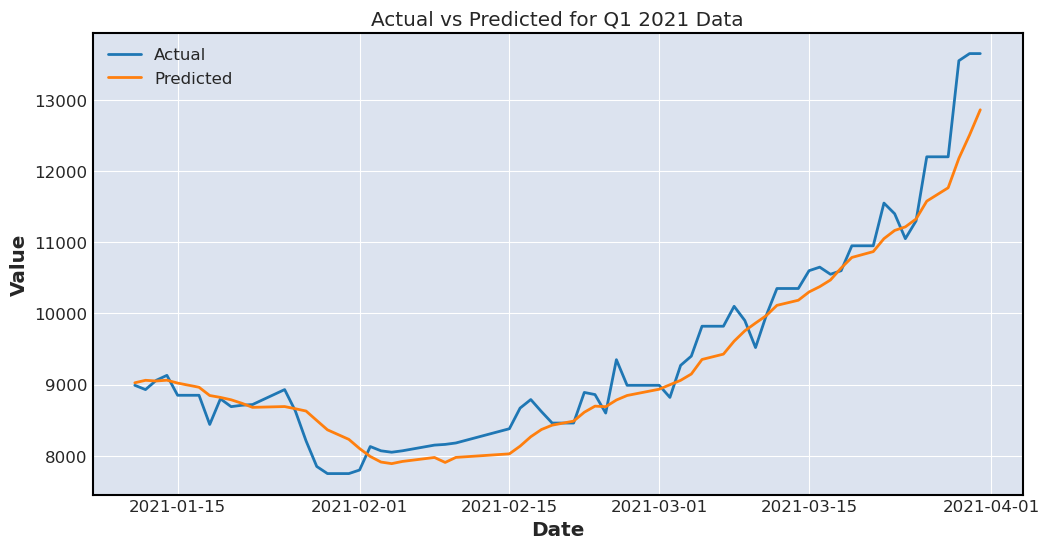

Mean Squared Error (Q1 2021): 141718.22751752494
R-squared score: 0.8879907287298312


In [79]:
import matplotlib.pyplot as plt

# Increase the figure size
plt.figure(figsize=(12, 6))

# Plotting actual values
plt.plot(q1_data.index, q1_target, label='Actual')

# Plotting predicted values
plt.plot(q1_data.index, q1_predictions, label='Predicted')


# Set labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Predicted for Q1 2021 Data')

# Add legend
plt.legend()

# Display the plot
plt.show()

print(f"Mean Squared Error (Q1 2021): {q1_mse}")
print("R-squared score:", r2)

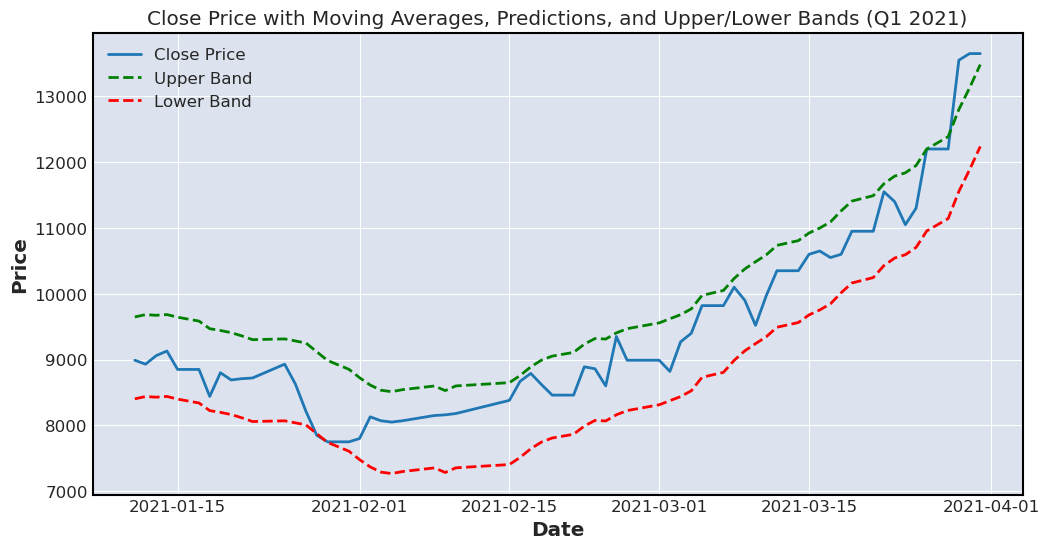

In [80]:
import numpy as np
    
# Calculate upper and lower bands based on the predictions
rstd = q1_predictions.std()  # Calculating the residual standard deviation
upper_band = q1_predictions + (.5 * rstd)
lower_band = q1_predictions - (.5 * rstd)

# Plot close prices with upper and lower bands
plt.figure(figsize=(12, 6))
plt.plot(q1_data.index, q1_data['Close'], label='Close Price')
plt.plot(q1_data.index, upper_band, label='Upper Band', linestyle='--', color='g')
plt.plot(q1_data.index, lower_band, label='Lower Band', linestyle='--', color='r')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close Price with Moving Averages, Predictions, and Upper/Lower Bands (Q1 2021)')
plt.legend()
plt.show()

In [81]:
# Calculate upper and lower bands based on the predictions
rstd = q1_predictions.std()  # Calculating the residual standard deviation
upper_band =pd.DataFrame(q1_predictions + (.5 * rstd))
lower_band = pd.DataFrame(q1_predictions - (.5 * rstd))

# Create a new column to store the classification labels
q1_data['Classification'] = 'Hold'

# Iterate over the data and classify based on intersections
for i in range(1, q1_data.shape[0]):
    if q1_data['Close'].iloc[i] > upper_band.iloc[i][0] and q1_data['Close'].iloc[i - 1] <= upper_band.iloc[i - 1][0]:
        q1_data['Classification'].iloc[i] = 'Sell'
    elif q1_data['Close'].iloc[i] < lower_band.iloc[i][0] and q1_data['Close'].iloc[i - 1] >= lower_band.iloc[i - 1][0]:
        q1_data['Classification'].iloc[i] = 'Buy'

# Print the data with classification labels
print(q1_data[['Close', '30-day Moving Average', '90-day Moving Average', 'Classification']])

              Close  30-day Moving Average  90-day Moving Average  \
Date                                                                
2021-01-11   8990.0            9075.714286            9075.714286   
2021-01-12   8930.0            9111.428571            9111.428571   
2021-01-13   9060.0            9101.428571            9101.428571   
2021-01-14   9130.0            9112.857143            9112.857143   
2021-01-15   8850.0            9071.428571            9071.428571   
...             ...                    ...                    ...   
2021-03-26  12200.0            9990.666667           11342.857143   
2021-03-28  12200.0           10115.333333           11521.428571   
2021-03-29  13550.0           10285.000000           11892.857143   
2021-03-30  13650.0           10443.666667           12192.857143   
2021-03-31  13650.0           10603.333333           12514.285714   

           Classification  
Date                       
2021-01-11           Hold  
2021-01-12        

/tmp/ipykernel_20/757242668.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_20/757242668.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [82]:
import pandas as pd
import plotly.graph_objects as go
from plotly.offline import plot


# Add this line to display plots inline
%matplotlib inline

# Create traces for the buy/sell signals
buy_signals = go.Scatter(
    x=q1_data[q1_data['Classification'] == 'Buy'].index,
    y=q1_data[q1_data['Classification'] == 'Buy']['Close'],
    mode='markers',
    marker=dict(symbol='triangle-up', size=10, color='green'),
    name='Buy Signals'
)
sell_signals = go.Scatter(
    x=q1_data[q1_data['Classification'] == 'Sell'].index,
    y=q1_data[q1_data['Classification'] == 'Sell']['Close'],
    mode='markers',
    marker=dict(symbol='triangle-down', size=10, color='red'),
    name='Sell Signals'
)

# Trace for the actual price
actual_price = go.Scatter(
    x=q1_data.index,
    y=q1_data['Close'],
    mode='lines',
    name='Actual Price'
)

# Create the layout
layout = go.Layout(
    title='Stock Price with Buy/Sell Signals',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Price')
)

# Create the data variable and include all the traces
data = [actual_price, buy_signals, sell_signals]

# Create the figure and plot
fig = go.Figure(data=data, layout=layout)

# Change this line to specify the rendering method as an iframe
fig.show(renderer='iframe')

# Export the plot to an HTML file
plot(fig, filename='SouthKoreaStockPlot.html')

'SouthKoreaStockPlot.html'